# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. 

__Цель исследования:__

1. Определить рыночную стоимость объектов недвижимости Санкт-Петербурга и соседних населенных пунктов.
2. Выявить интересные особенности и зависимости на рынке недвижимости.
3. Установить какие факторы влияют на стоимость квартир.

__Ход исследования:__

1. Необходимо получить данные из датафрейма.
2. Изучить общую информацию о полученных данных.
3. Проверить данные на ошибки и оценить их влияние на исследование.
4. Провести предобработку данных:
    - заполнить пропущенные значения там, где это возможно, удалить или принять решение и  оставить пустыми;
    - преобразовать тип данных по необходимости;
    - выявить и устранить явные и неявные дубликаты;
    - обработать аномальные значения.
5. Добавить необходимые для анализа столбцы.
6. Провести исследовательский анализ, оценить влияние параметров на цену.
7. Подвести итоги проделанной работе и написать выводы. 

### Изучение общей информации о данных

__Загрузим необходимые для проекта библиотеки и загрузим файл с данными в датафрейм.__

In [1]:
#загрузим используемые библиотеки
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [ ]:
#загрузим файл в датафрейм 'data'
try:
    data = pd.read_csv('.csv',  sep ='\t')
    
except:
    data = pd.read_csv('.csv', sep ='\t')


__Посмотрим на первые пять строк таблицы.__

In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
#посмотрим на последние пять строк датафрейма
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__Посмотрим общую информацию о полученном датафрейме.__

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

_В полученном датафрейме 22 слолбца 23699 строк._
_По описанию данных к проекту столбцы содержат информацию:_

- расстояние до ближайшего аэропорта в метрах (м)
- число балконов
- высота потолков (м)
- расстояние до центра города (м)
- сколько дней было размещено объявление (от публикации до снятия)
- дата публикации
- этаж
- всего этажей в доме
- апартаменты (булев тип)
- площадь кухни в квадратных метрах (м²)
- цена на момент снятия с публикации
- жилая площадь в квадратных метрах (м²)
- название населённого пункта
- свободная планировка (булев тип)
- число парков в радиусе 3 км
- расстояние до ближайшего парка (м)
- число водоёмов в радиусе 3 км
- расстояние до ближайшего водоёма (м)
- число комнат
- квартира-студия (булев тип)
- общая площадь квартиры в квадратных метрах (м²)
- число фотографий квартиры в объявлении

**На данном этапе выявлены следующие проблемы:**

1) Не все наименования столбцов приведены к змеиному регистру (`cityCenters_nearest`).

2) В описании к данным заявлено - 3 столбца с булевым типом данных, по факту - только два таких столбца (`open_plan` и `studio`) а в `is_apartment` тип `object` вместо заявленного `bool`.

3) Пропущенны значения в 14 столбцах из 22.

4) В 5 столбцах где по смыслу должны быть целые числа (`int`) тип данных `float` (вещественный тип), в некоторых столбцах необходимо заменить тип данных.



__Построем общую гистограмму для всех столбцов таблицы с помощью метода `hist()`.__

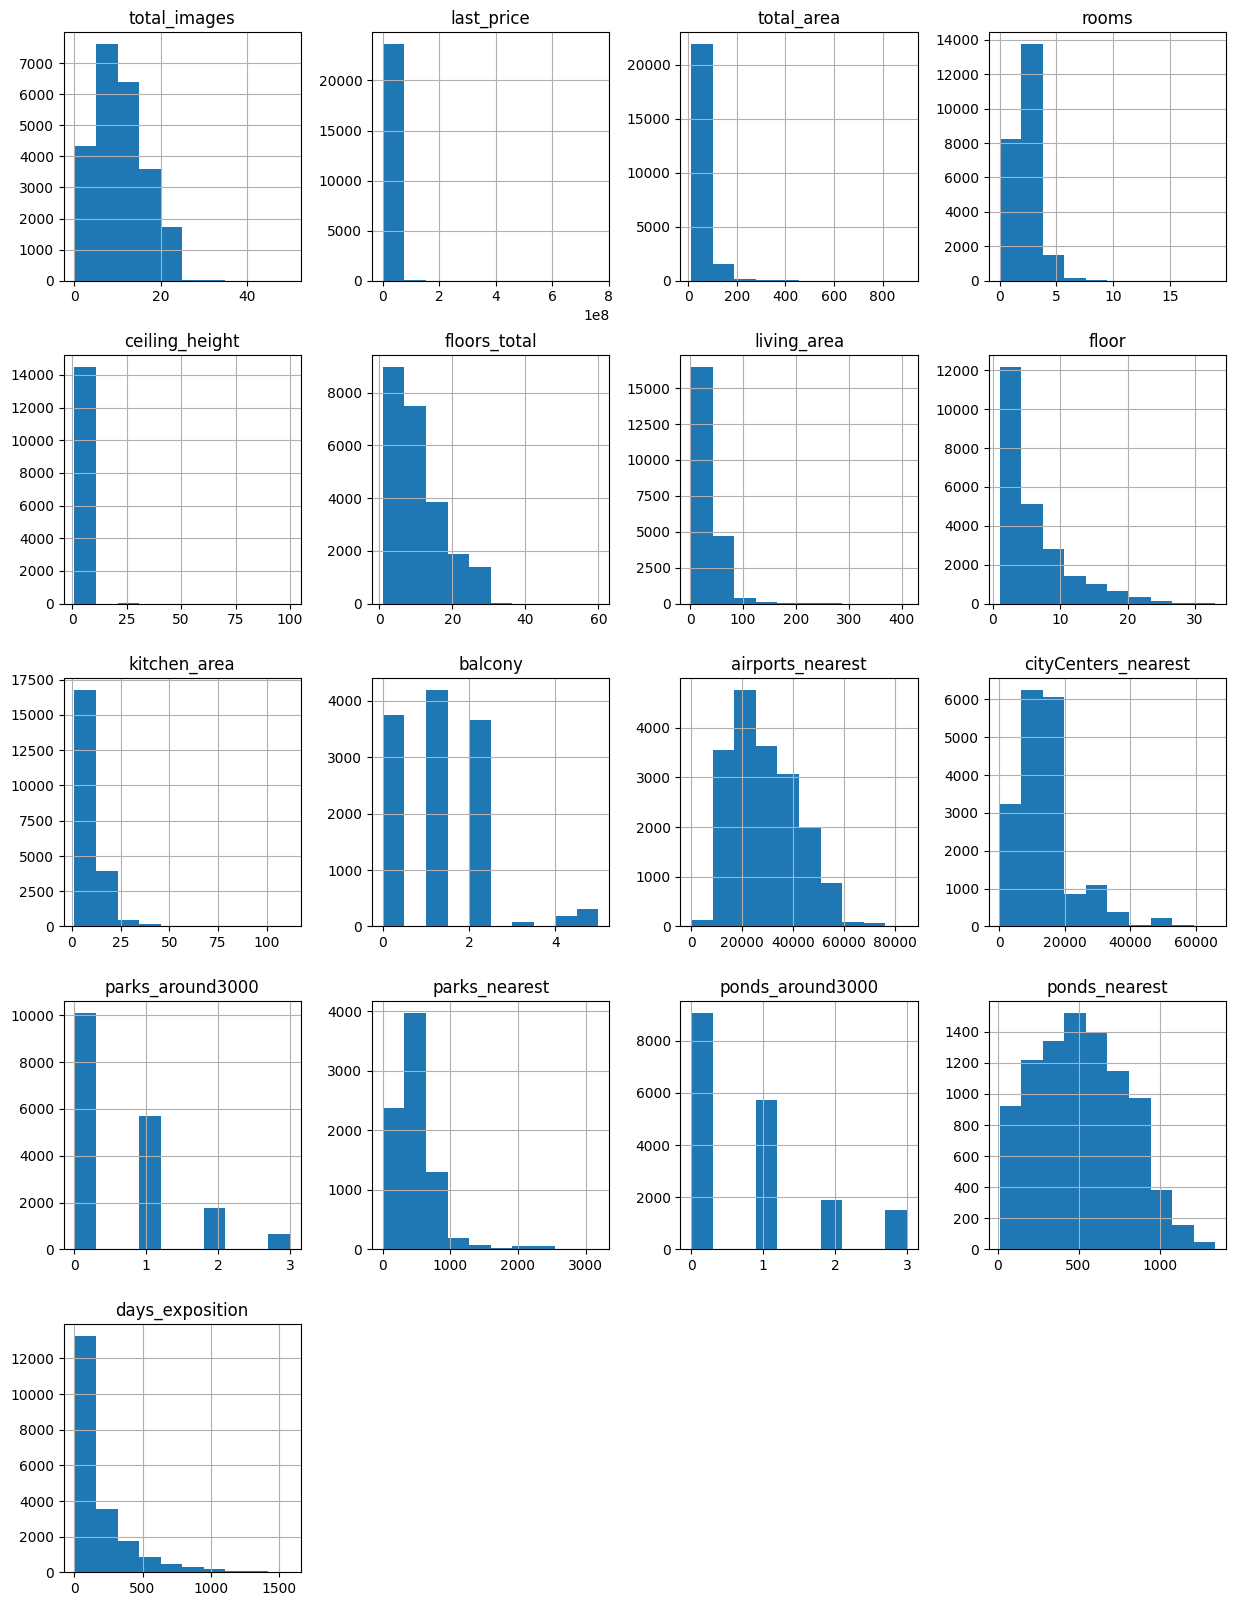

In [5]:
data.hist(figsize = (15, 20));

__По гистограммам можно увидеть:__

- Есть аномальные значения в столбцах с данными о высоте потолка, общей площадью квартиры, количеством комнат, жилой площади, площадью кухни.

- В столбце `last_price` с указанием цены на момент снятия обьявления необходимо поменять тип значения, так как показатели не соответствуют логическому значению строк.

- Некоторые столбцы требуют детального изучения с более подробными параметрами показателей, так как такая общая гистограмма не является показательной.

__Ознакомимся с числовыми характеристиками по столбцам.__

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Предобработка данных

#### Приведем наименование столбца `cityCenters_nearest` к змеиному регистру

In [7]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

#### Выведем количество пропущенных значений для каждого столбца, используя комбинацию двух методов.

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

__Описание пропущеных значений__

_в 14 столбцах из 22 есть пропущенные значения, в каждом из столбцов по 23699 строк незаполнены:_

- ceiling_height (9195) - пропущена высота потолка больше чем в 30% данных, заполним медианным значением
- floors_total (86) - количество пропущенных строк общего колличества этажей в доме не значительна, можно заполнить медианным значением среди квартир такой же высоты
- living_area (1903) - жилая площадь, можно заполнить медианным значением среди квартир с такой же общей площадью
- is_apartment (20924) - вероятнее всего пропущены значения там где не аппартаменты, заполним `False`
- kitchen_area (2278) - заполним медианным значением среди квартир с такой же общей площадью
- balcony (11519) - вероятно, что там где не указано колличество балконов - их нет, заменим пропуск на "0"
- locality_name(49) - данные не заполнили, процент незаполненных строк ничтожно мал и не повлияет на исследование, поэтому эти строки стоит удалить
- airports_nearest(5542) - вероятно эти квартиры относятся к пригороду Санкт-Петербурга (деревни, поселки) и данные отсутствуют ввиду отсутствия аэропорта в населенном пункте, данные значения можно заполнить медианными группировкой по населенному пункту, после обработки неявных дубликатов в наименованиях с населенными пунктами.
- city_centers_nearest(5519) - вероятно эти квартиры относятся к пригороду Санкт-Петербурга (деревни, поселки) и данные отсутствуют ввиду отсутствия центра города в населенном пункте, данные значения можно заполнить медианными группировкой по населенному пункту, после обработки неявных дубликатов в наименованиях с населенными пунктами.
- parks_around3000(5518) - значит парков нет в радиусе 3км, можно заполнить "0"
- parks_nearest(15620) - значит парков нет, оставляем Null
- ponds_around3000(5518) - значит водоёмов нет в радиусе 3км, можно заполнить "0"
- ponds_nearest(14589) - значит водоёмов нет, оставляем Null
- days_exposition(3181) - в данном случае вероятнее всего что обьявление не было опубликовано, либо, оно не было снято на момент выгрузки таблицы и находилось в публикации и такие обьявления стоит исключить из выборки, так как они могут не отражать реальной стоимости, что может исказить результаты исследования, таких обьявлений около 13%.

#### Заполним пропущенные значения там где это возможно.

In [9]:
#заполним "0" значениями строки где вероятнее всего пропущенные значения говорят об отсутствии данного показателя 
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [10]:
#можем предположить что в столбце 'is_apartment' пропущенные значения - это не апартаменты и присвоить False
data['is_apartment'] = data['is_apartment'].fillna(False)

In [11]:
#заполним пропуски в общем количестве этажей медианными значениями с группировкой по количеству этажа в обьявлении
for floor in data['floor'].unique():
    median = data.loc[data['floor'] == floor, 'floors_total'].median()
    data.loc[(data['floors_total'].isna()) & (data['floor'] == floor), 'floors_total'] = median

In [12]:
#заполним медианными значениями пропуски в столбцах с высотой потолков  
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

In [13]:
#для площади кухни заменим пропуски средними значениями среди квартир с такой же общей площадью
kitchen_ratio = data['kitchen_area'].median() / data['total_area'].median()
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

#для жилой площади так же найдем соотношение средней жилой площади к средней общей площади  
#и заполним пропуски произведением общей площади и этого коэффициента
living_ratio = data['living_area'].median() / data['total_area'].median()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)

In [14]:
#удаляем пустые строки с данными о населенном пункте 
data = data.dropna(subset=['locality_name'])

In [15]:
data = data.dropna(subset=['days_exposition'])

In [16]:
#проверим остались ли в датафрейме пропущенные значения
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         4668
city_centers_nearest     4646
parks_around3000            0
parks_nearest           13551
ponds_around3000            0
ponds_nearest           12601
days_exposition             0
dtype: int64

__По оставшимся пропущенным значениям:__

Оставшиеся пропуски нет возможности заполнить, они остаются как есть.
- airports_nearest(5542) - вероятно эти квартиры относятся к пригороду Санкт-Петербурга (деревни, поселки) и данные отсутствуют ввиду отсутствия аэропорта в населенном пункте, данные значения можно заполнить медианными группировкой по населенному пункту, после обработки неявных дубликатов в наименованиях с населенными пунктами.
- city_centers_nearest(5519) - вероятно эти квартиры относятся к пригороду Санкт-Петербурга (деревни, поселки) и данные отсутствуют ввиду отсутствия центра города в населенном пункте, данные значения можно заполнить медианными группировкой по населенному пункту, после обработки неявных дубликатов в наименованиях с населенными пунктами.
- parks_nearest(15620) - значит парков нет, оставляем Null
- ponds_nearest(14589) - значит водоёмов нет, оставляем Null

_К пропускам данных вероятнее всего привели технические ошибки и человеческий фактор - ввиду непонимания что при отсутствии того или иного показателя все равно нужно заполнять, в случае с наименованием населенного пункта - не всегда удается найти тот или иной пункт в классификаторе._

_По логике - в таких столбцах как количество балконов, аппартаменты, наличие парка или водоема, говорят о том что они отсутствуют и поэтому их заполнили 0. В других данных правильнее было заполнить медианным значением, так как медиана в отличие от среднего значения, менее чувствительна к выбросам, среднее значение смещается в сторону выбросов. Еще был использован метод заполнения пропуска по соотношению средних величин._

#### Преобразуем типы данных

In [17]:
# Приводим в целочисленный тип стоимость квартиры 
data['last_price'] = data['last_price'].astype(int)
    
# Приводим к типу даты дату публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
   
# Приводим в целочисленный тип количество балконов. 
data['balcony'] = data['balcony'].astype(int)
    
# Приводим в целочисленный тип количество парков. 
data['parks_around3000'] = data['parks_around3000'].astype(int)

# Приводим в целочисленный тип количество прудов. 
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

# Приводим в целочисленный тип количество комнат. 
data['rooms'] = data['rooms'].astype(int)

# Приводим в целочисленный тип количество этажей всего. 
data['floors_total'] = data['floors_total'].astype(int)

# Приводим в целочисленный тип количество дней публикации. 
data['days_exposition'] = data['days_exposition'].astype(int)

# Приводим в целочисленный тип количество дней публикации. 
data['is_apartment'] = data['is_apartment'].astype(bool)

_Тип данных необходимо менять для экономии памяти, удобства анализа и  визуализации данных, группировки по категориям в целом для удобства работы с такими данными._
Тип данныщх был изменен в следующих столбцах:

- `last_price` - стоимость квартиры приведена к целочисленному значению для наглядности и удобства группировки и наглядности (обычно квартиры не продают с копейками, поэтому стоит отбросить эти значения.  
- `first_day_exposition` - дата публикации, должен быть формат дата, поэтому приводим к этому формату
- `balcony`, `parks_around3000`, `ponds_around3000`, `rooms`, `floors_total`, `days_exposition` - по значению это целочисленные значения, и измеряются целыми числами, поэтому приводим их к `int`
- `is_apartment` - аппартаменты - заявлен булев тип, но по факту был `object`, поэтому форматируем 

#### Удалим неявные дубликаты

__Изучим уникальные значения в столбце с названиями населенных пунктов для выявления неявных дубликатов__

In [18]:
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Фёдоровское',
 'городской посёлок Янино-1',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',

Среди наименований населенных пунктов есть неявные дубликаты, такие дубликаты образовались из-за использования буквы е и ё, из-за употребления поселок и поселок городского типа, городской поселок, например: `поселок Аннино` и `посёлок Аннино`, `поселок Рябово` и `поселок городского типа Рябово`, `поселок городского типа Токсово` и `посёлок городского типа Токсово`, `поселок городского типа Большая Ижора` и `городской поселок Большая Ижора`. Это названия одного и того же населенного пункта, но записаны по разному. 

__Проверив в сервисе Яндекс.Карты названия `посёлок Рябово` и `поселок городского типа Рябово`, выяснила что это разные населенные пунткы, и в целом есть большая разница между `поселком` и `поселком городского типа`:__

__Если сравнивать посёлок и посёлок городского типа, то посёлок городского типа обязательно должен иметь поликлинику, несколько школ, больше десятка улиц, железнодорожную станцию, ночной клуб, парки и другие досуговые места. Посёлок может всего этого не иметь, в нём, даже может не быть церкви, ведь это посёлок, а не село. Посёлок городского типа обычно имеет несколько церквей.__

А вот городской поселок и поселок городского типа это названия одного и того же типа поселения, поэтому произведем их замену.


Для обработки неявных дубликатов:

- создадим отдельный столбец для исправленных наименований;
- приведем всё к нижнему регистру;
- заменим все `ё` на `е`;
- заменим `городской поселок` на `поселок городского типа`



In [19]:
#создадим новый столбец повторяющий наименования населенных пунктов но приведенный к нижнему регистру
data['locality_name_replace'] = data['locality_name'].str.lower()

In [20]:
#выведем количество уникальных значений
def length_locality_name():
    return print('Количество уникальных занчений locality_name_replace:', \
                 data['locality_name_replace'].unique().shape[0])
length_locality_name()

Количество уникальных занчений locality_name_replace: 330


In [21]:
#заменим все "ё" на "е"
data['locality_name_replace'] = data['locality_name_replace'].str.replace('ё', 'е')
print('Заменяем все "ё" на "е"')
length_locality_name()
print()

Заменяем все "ё" на "е"
Количество уникальных занчений locality_name_replace: 299



In [22]:
#заменим городской поселок на поселок городского типа       
data['locality_name_replace'] = data['locality_name_replace']\
.str.replace('городской поселок', 'поселок городского типа')

In [23]:
#выведем количество уникальных значений
def length_locality_name():
    return print('Количество уникальных занчений locality_name_replace:', \
                 data['locality_name_replace'].unique().shape[0])
length_locality_name()

Количество уникальных занчений locality_name_replace: 294


In [24]:
sorted(data['locality_name_replace'].unique())

['бокситогорск',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'высоцк',
 'гатчина',
 'деревня агалатово',
 'деревня аро',
 'деревня батово',
 'деревня бегуницы',
 'деревня белогорка',
 'деревня большая вруда',
 'деревня большая пустомержа',
 'деревня большие колпаны',
 'деревня большое рейзино',
 'деревня бор',
 'деревня борисова грива',
 'деревня ваганово',
 'деревня вартемяги',
 'деревня вахнова кара',
 'деревня выскатка',
 'деревня гарболово',
 'деревня глинка',
 'деревня горбунки',
 'деревня гостилицы',
 'деревня заклинье',
 'деревня заневка',
 'деревня зимитицы',
 'деревня извара',
 'деревня иссад',
 'деревня калитино',
 'деревня кальтино',
 'деревня камышовка',
 'деревня каськово',
 'деревня келози',
 'деревня кипень',
 'деревня кисельня',
 'деревня колтуши',
 'деревня кудрово',
 'деревня кузьмолово',
 'деревня куровицы',
 'деревня куттузи',
 'деревня лаврики',
 'деревня лаголово',
 'деревня лампово',
 'деревня лесколово',
 'деревня лопухинка',
 'деревня лупполово',
 'дерев

_Благодаря проведенной предобработке было удалено 36 неявных дубликатов среди уникальных значений_

__После обработки неявных дубликатов, можно заполнить пропуски в данных по расстоянию до центра и до аэропорта медианным значением группируя по населенным пунктам__

In [25]:
if data['city_centers_nearest'].isnull().sum() > 0:
    data['city_centers_nearest'] = data.groupby(
        'locality_name_replace'
    )['city_centers_nearest'].apply(lambda x: x.fillna(x.median()))
    data['city_centers_nearest'] = data['city_centers_nearest'].fillna(
        data['city_centers_nearest'].median()
    )
else:
    data['city_centers_nearest'] = data.groupby(
        'locality_name_replace'
    )['city_centers_nearest'].apply(lambda x: x.fillna(x.median()))

In [26]:
#по этому же принципу заполним пустые значения расстояния до аэропорта
if data['airports_nearest'].isnull().sum() > 0:
    data['airports_nearest'] = data.groupby('locality_name_replace')\
    ['airports_nearest'].apply(lambda x: x.fillna(x.median()))
    data['airports_nearest'] = data['airports_nearest']\
    .fillna(data['airports_nearest'].median())
else:
    data['airports_nearest'] = data.groupby('locality_name_replace')\
    ['airports_nearest'].apply(lambda x: x.fillna(x.median()))
    

#### Обработка явных дубликатов

In [27]:
#проверим наличие строк-дубликатов
data.duplicated().sum()

0

Дубликаты в полученном датафрейме отсутствуют

#### Обработка аномальных значений

In [28]:
#Посмотрим на распределение значений в данных
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,20470.000000,2.047000e+04,20470.000000,20470.000000,20470.000000,20470.000000,20470.000000,20470.000000,20470.00000,20470.000000,20470.000000,20470.000000,20470.000000,6919.000000,20470.000000,7869.000000,20470.000000
mean,9.614753,6.264805e+06,58.845355,2.023889,2.715588,10.870103,33.652703,5.988227,10.34837,0.592330,29193.565804,14341.292452,0.464436,491.119526,0.587787,520.259626,180.753200
std,5.659263,1.087355e+07,34.080771,1.054972,0.971157,6.650666,21.406208,4.941784,5.78635,0.949376,11837.559722,7673.769287,0.745157,345.812920,0.878849,277.190222,219.777916
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.00000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,39.500000,1.000000,2.600000,5.000000,18.600000,2.000000,7.00000,0.000000,20942.500000,11004.000000,0.000000,286.500000,0.000000,300.000000,45.000000
50%,9.000000,4.500000e+06,50.800000,2.000000,2.650000,9.000000,30.000000,4.000000,9.00000,0.000000,27360.000000,13354.500000,0.000000,451.000000,0.000000,504.000000,95.000000
75%,14.000000,6.500000e+06,67.800000,3.000000,2.700000,16.000000,41.300000,8.000000,11.80000,1.000000,36000.000000,15883.750000,1.000000,613.000000,1.000000,731.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.00000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Пройдемся по столбцам, где значения выглядят аномальными и устраним редкие и выбивающиеся значения.
Столбцы которые вызвали подозрение максимальными и минимальными значениями:
- `last_price` - минимальное значение в 12190 выглядит неправдоподобно для стоимости недвижимости;
- `total_area` - общая площадь 900 квадратных метров - это редкое явление, от подобных стоит избавиться;
- `rooms` - нужно исследовать нулевые значения;
- `ceiling_height` - высота потолка по СНиП должна быть не меньше 2,5 метров, значения меньше этого стоит убрать. Высота (от пола до потолка) жилых комнат и кухни (кухни-столовой) в климатических подрайонах IA, IБ, IГ, IД и IIА, определяемых по СП 131.13330, должна быть не менее 2,7 м, а в других климатических подрайонах - не менее 2,5 м.;
- `floors_total` - самый высокий дом в Санкт-Петербурге в эксплуатации - 37 этажей. В 2018 году построе небоскреб в 87 этажей, но он до 2021 года еще не был введен в эксплуатацию и там нет жилых помещений, возможно аппартаменты, но они еще не были введены в эксплуатацию, поэтому в выборке их не может быть.
- `living_area` - жилая млощадь в 2 квадратных метра и 409 - выглядят неправдоподобно и аномально, их тоже нужно убрать. Согласно действующим СНиПам, минимальная площадь комнаты должна быть не менее 8 квадратных метров (п. 5.3 СП 5.413330.2011), при этом её ширина не должна быть меньше 2,25 метра (п 6.1.9 СП 31-107-2004) При несоблюдении хотя бы одного из этих условий, считать комнату жилой нельзя.
- `kitchen_area` - сложно представить кухню в 112 квадратов, такие значения редкие, их стоит убрать из выборки.

In [29]:
#по значениям "last_price" выведем минимальные и максимальные значения
print('Квартир стоимостью 0:', data.query('last_price == 0')['last_price'].count())
print('Квартир стоимостью меньше 100.000:', data.query('last_price < 1e+05')['last_price'].count())
print('Квартир стоимостью больше 1.000.000:', data.query('last_price < 1e+06')['last_price'].count())
print('Квартир стоимостью больше 100.000.000:', data.query('last_price > 1e+08')['last_price'].count())

Квартир стоимостью 0: 0
Квартир стоимостью меньше 100.000: 1
Квартир стоимостью больше 1.000.000: 180
Квартир стоимостью больше 100.000.000: 32


In [30]:
#посмотрим на данные по квартире стоимостью < 100.000
data.query('last_price < 1e+05')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_replace
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8,санкт-петербург


При жилой площади в 109 кв.м., цена неадекватная. Похоже что при заполнении обьявления была допущена ошибка и цена указана в тысячах, что привело к такому значению. Посмотрим на обьявления с примерно такими же общей и жилой площадями и колличеством комнат

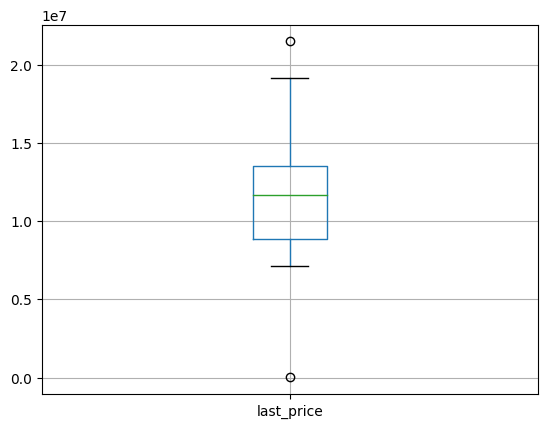

In [31]:
data_pivot_price = data.query('100<=total_area<=110 and 9000<=city_centers_nearest<=10000')

data_pivot_price.boxplot('last_price');

По удаленности от центра для квартир схожей общей площадью характерна стоимость свыше 10млн., поэтому скорее всего на заполнение повлиял человеческий фактор. Можно поправить цену выбивающегося значения умножив на тысячу. Так же по графику видно что есть аномальная для такой площади квартиры на данном расстоянии от центра города цена, свыше 20 млн.руб., его можно убрать.

In [32]:
data.update(data[data['last_price'] <= 1e+05]['last_price'] * 1000)
data.drop(
    index=data.query(
        '100<=total_area<=110 and 9000<=city_centers_nearest<=10000 and last_price>2e+07'
    ).index,inplace=True)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,32.000000,3.200000e+01,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,24.000000,32.000000,28.000000,32.000000
mean,15.281250,1.951798e+08,320.609375,5.281250,3.321250,7.156250,182.943005,5.718750,42.415156,0.468750,26443.750000,4475.625000,1.593750,398.041667,1.968750,339.535714,339.093750
std,4.760282,1.316798e+08,150.686687,1.818088,0.773233,3.655393,72.936680,4.113192,22.541472,1.106706,4334.478642,2568.049087,1.160072,190.644782,1.092035,180.347706,271.114588
min,3.000000,1.154900e+08,124.500000,3.000000,2.650000,4.000000,36.000000,2.000000,12.000000,0.000000,20399.000000,436.000000,0.000000,116.000000,0.000000,83.000000,18.000000
25%,11.750000,1.248700e+08,239.500000,4.000000,2.650000,5.000000,139.759615,3.750000,28.350000,0.000000,22945.250000,2311.750000,0.750000,215.000000,1.000000,198.000000,170.750000
50%,16.500000,1.440000e+08,274.000000,5.000000,3.250000,7.000000,177.192308,5.000000,40.000000,0.000000,25208.500000,4644.500000,2.000000,406.500000,2.000000,269.000000,254.000000
75%,20.000000,2.006525e+08,385.000000,6.000000,3.625000,8.000000,220.000000,7.000000,50.800000,0.000000,31139.500000,5972.250000,3.000000,531.750000,3.000000,482.750000,416.000000
max,20.000000,7.630000e+08,900.000000,12.000000,6.000000,25.000000,409.700000,25.000000,112.000000,5.000000,34159.000000,12313.000000,3.000000,727.000000,3.000000,756.000000,1094.000000


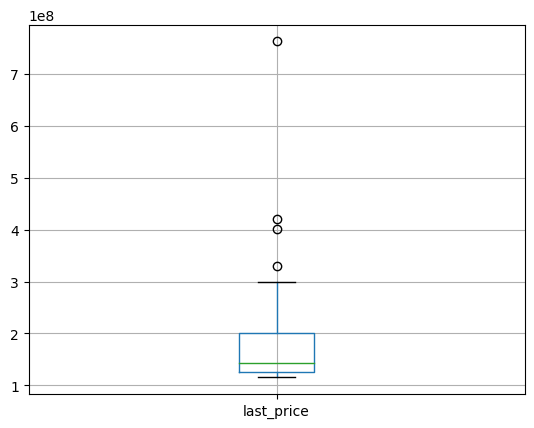

In [33]:
#посмотрим на квартиры со стоимостью больше ста миллионов

data.query('last_price > 1e+08').boxplot('last_price');

data.query('last_price > 1e+08').describe()

_У большинства квартир стоимостью свыше ста миллионов жилая площадь более ста квадратных метров, а общая более двухсот, есть так же квартира с аномальным значением в девятьсот квадратных метров. Практические все квартиры данного среза достаточно удалены от цетра._
Показатели сильно выбиваются от остальных обьявлений, их не много, скорее это элитное жильё, их удаляем.

In [34]:
data.drop(
    index=data.query('last_price > 1e+08').index, 
    inplace=True
)

print(
    'Квартир стоимостью меньше 100.000:', 
    data.query('last_price < 1e+05')['last_price'].count()
)

print(
    'Квартир стоимостью больше 100.000.000:', 
    data.query('last_price > 1e+08')['last_price'].count()
)

Квартир стоимостью меньше 100.000: 0
Квартир стоимостью больше 100.000.000: 0


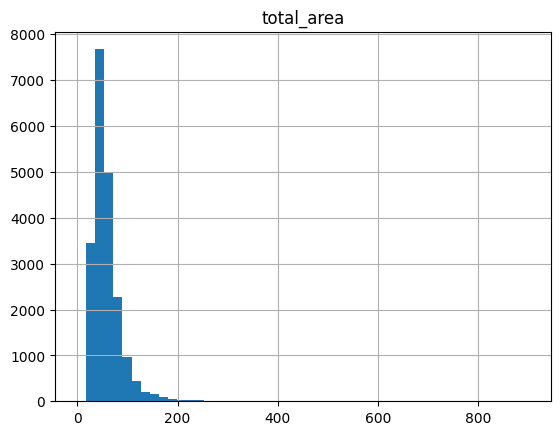

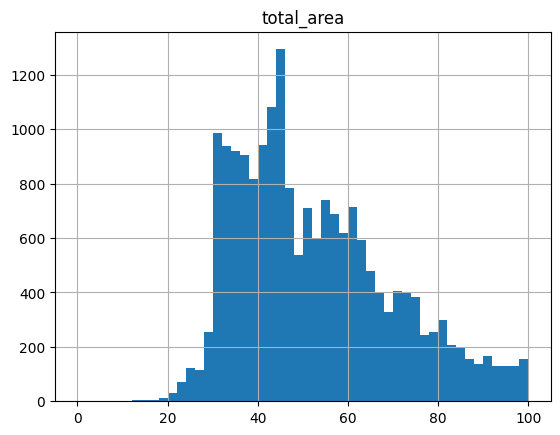

In [35]:
# посмотрим на показатели 'total_area'
data.hist('total_area', bins=50, range=(0,900));
data.hist('total_area', bins=50, range=(0,100));

In [36]:
print(
    'Квартир площадью менее 10 кв.м.:',
    data.query('total_area < 10')['total_area'].count()
)

print(
    'Квартир площадью менее 20 кв.м.:',
    data.query('total_area < 20')['total_area'].count()
)

print(
    'Квартир площадью более 500 кв.м.:',
    data.query('total_area > 500')['total_area'].count()
)

Квартир площадью менее 10 кв.м.: 0
Квартир площадью менее 20 кв.м.: 27
Квартир площадью более 500 кв.м.: 2


В `total_area` нет квартир площадью меньше 10 кв.м., но есть меньше 20, вероятнее всего это комнаты в коммунальных квартирах, которые не редкость для Санкт-Петербурга, или аппартаменты.
Квартиры со слишком большой площадью более 500 кв.м. похожи на элитную недвижимость, их немного и лучше удалить такие редкие значения.

In [37]:
data.drop(index=data.query('total_area > 500').index,inplace=True)

In [38]:
#посмотрим сколько квартир с колличеством комнат 0
print('Квартиры без комнат:',data.query('rooms == 0')['rooms'].count())

Квартиры без комнат: 183


In [39]:
#проверим, являются ли эти квартиры студиями, аппартаментами или со свобоной планировкой
print('Квартиры без комнат и студии:',data.query('rooms == 0 and studio')['rooms'].count()) 
print('Квартиры без комнат и апартаменты:',data.query('rooms == 0 and is_apartment')['rooms'].count()) 
print('Квартиры без комнат и свободная планировка:',data.query('rooms == 0 and open_plan')['rooms'].count())
print('Квартиры без комнат не свободная планировка и не апартаменты:',data.query('rooms == 0 and ~open_plan and ~studio')['rooms'].count())
print('Квартиры с комнатами > 6:',data.query('rooms > 6')['rooms'].count())

Квартиры без комнат и студии: 124
Квартиры без комнат и апартаменты: 0
Квартиры без комнат и свободная планировка: 59
Квартиры без комнат не свободная планировка и не апартаменты: 0
Квартиры с комнатами > 6: 54


 `rooms` - есть нулевые значения, 183 - это студии, и квартиры со свободной планировкой.
 
Колличество квартир с более чем 7 комнат - 34 шт., эти значения выбиваются из общих показателей, но их колличество незначительно, поэтому данные аномалии убираем.

In [40]:
data.drop(index=data.query('rooms > 6').index,inplace=True)

In [41]:
#посмотрим показатели "ceiling_height" - высота потолка
print(
    'Квартиры с потолками до 2,5м:' + str(data.query(
        'ceiling_height < 2.5'
    )['ceiling_height'].count()) + ' шт.'
)

print(
    'Квартиры с потолками от 4м до 5м:' + str(data.query(
        'ceiling_height > 4 and ceiling_height <= 5'
    )['ceiling_height'].count()) + ' шт.'
)

print(
    'Квартиры с потолками от 5м до 25м:' + str(data.query(
        'ceiling_height > 5 and ceiling_height < 25'
    )['ceiling_height'].count()) + ' шт.'
)

print(
    'Квартиры с потолками от 25м до 36м:' + str(data.query(
        'ceiling_height >= 25 and ceiling_height <= 36'
    )['ceiling_height'].count()) + ' шт.'
)

print(
    'Квартиры с потолками от 36м до 50м:' + str(data.query(
        'ceiling_height > 36 and ceiling_height < 50'
    )['ceiling_height'].count()) + ' шт.'
)

print(
    'Квартиры с потолками от 50м:' + str(data.query(
        'ceiling_height >= 50'
    )['ceiling_height'].count()) + ' шт.'
)

Квартиры с потолками до 2,5м:63 шт.
Квартиры с потолками от 4м до 5м:28 шт.
Квартиры с потолками от 5м до 25м:12 шт.
Квартиры с потолками от 25м до 36м:14 шт.
Квартиры с потолками от 36м до 50м:0 шт.
Квартиры с потолками от 50м:1 шт.


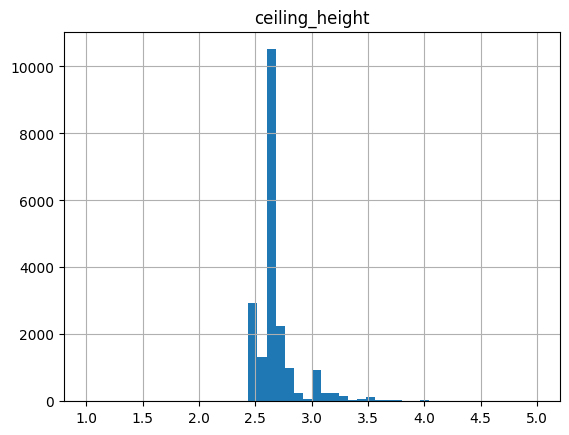

In [42]:
data.hist('ceiling_height',bins=50,range=(1,5));

_Высота потолков для жилых помещений установлены минимальные значения  в СП 54.13330.2016 «СНиП 31-01-2003 Здания жилые многоквартирные». В своде правил установлено, что в многоквартирных домах в центральной части России потолок должен быть не ниже 2,5 м._

Для Санкт-Петербурга потолки высотой от 4м до 5м, допустимы из-за наличия домов  старой застройки, когда это было определено архитектурным стилем, а так же дома с высокими потолками строились раньше так как отопление было печным, а освещение свечным, дым и пар скапливались под потолком где-то на метр, и чтобы люди не дышали этими скапливающимися парами, высоту потолка делали с расчетом где-то рост человека плюс метр на скопление этих газов. Такие дома чаще встречаются в центре города, где сохраняются старые постройки. Но 28 шт из более чем 20 тысяч квартир - это редкие выбивающиеся значения, их следует убрать из выборки.

Вероятнее всего, квартиры с высотой потолков от 25м до 36м - это опечатка  и соотвествуют значениям 2.5м - 3.6м
Исходя из этого можно считать, что все квартиры с высотой потолков от 36м являются выбросами.

Квартиры с высотой потолка 25м - 36м - оставляем но изменим значения поделив на 10.
Квартиры с высотой потолка до 2,5м - удаляем, так как они не пригодны для жилья согласно СНиП, остальные значения свыше 3,6м тоже удаляем так как являются выбросами.


In [43]:
data.update(data[(
    data['ceiling_height'] >= 25
) & (data['ceiling_height'] <= 36)]['ceiling_height']/10)

In [44]:
# удаляем потолки меньше 2,5м и свыше 3,6м
data.drop(index=data.query('ceiling_height < 2.5').index,inplace=True)
data.drop(index=data.query('ceiling_height > 3.6').index,inplace=True)

In [45]:
#проверим что осталось после удаления
print(
    'Квартиры с потолками до 2,5м: ' + str(data.query(
        'ceiling_height < 2.5'
    )['ceiling_height'].count())
)

print(
    'Квартиры с потолками от 4м до 5м: ' + str(data.query(
        'ceiling_height > 4 and ceiling_height <= 5'
    )['ceiling_height'].count())
)

print(
    'Квартиры с потолками от 5м до 25м: ' + str(data.query(
        'ceiling_height > 5 and ceiling_height < 25'
         )['ceiling_height'].count())
)

print(
    'Квартиры с потолками от 25м до 36м: ' + str(data.query(
        'ceiling_height >= 25 and ceiling_height <= 36'
    )['ceiling_height'].count())
)

print(
    'Квартиры с потолками от 36м до 50м: ' + str(data.query(
        'ceiling_height > 36 and ceiling_height < 50'
    )['ceiling_height'].count())
)

print(
    'Квартиры с потолками от 50м: ' + str(data.query(
        'ceiling_height >= 50'
    )['ceiling_height'].count())
)

Квартиры с потолками до 2,5м: 0
Квартиры с потолками от 4м до 5м: 0
Квартиры с потолками от 5м до 25м: 0
Квартиры с потолками от 25м до 36м: 0
Квартиры с потолками от 36м до 50м: 0
Квартиры с потолками от 50м: 0


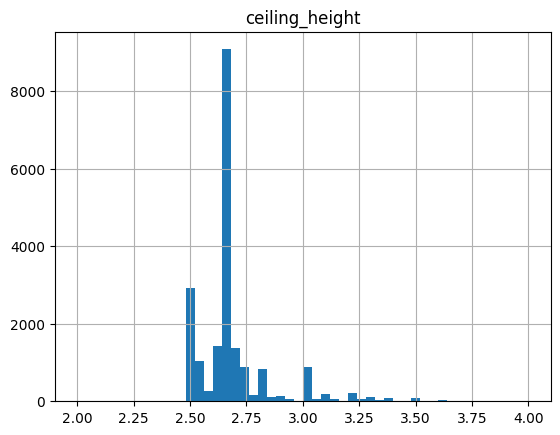

In [46]:
data.hist('ceiling_height',bins=50,range=(2,4));

Квартиры в одноэтажных домах: 18
Квартиры в домах более 37 этажей: 2


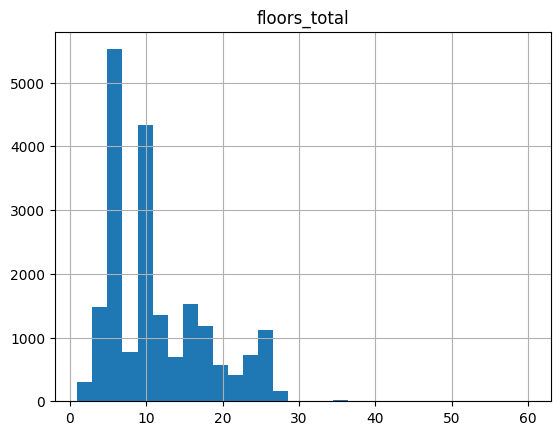

In [47]:
#рассмотрим показатель "floors_total" - всего этажей в доме
print('Квартиры в одноэтажных домах:',data.query(
        'floors_total == 1'
)['floors_total'].count())

print('Квартиры в домах более 37 этажей:',data.query(
    'floors_total > 37'
)['floors_total'].count())

data.hist('floors_total', bins=30);

Есть квартиры в одноэтажных домах, но это не похоже на выброс, оставляем.

Как уже было описано ранее, самый высокий дом в Санкт-Петербурге в эксплуатации - 37 этажей. В 2018 году построен небоскреб в 87 этажей, но он до 2021 года еще не был введен в эксплуатацию и там нет жилых помещений, возможно будут аппартаменты, но они еще не были введены в эксплуатацию, поэтому в выборке их не может быть. По гистограмме видно что значения свыше 29 этажа редкие, удаляем их из выборки.

In [48]:
data.drop(
    index=data.query('floors_total >= 30').index, 
    inplace=True
)

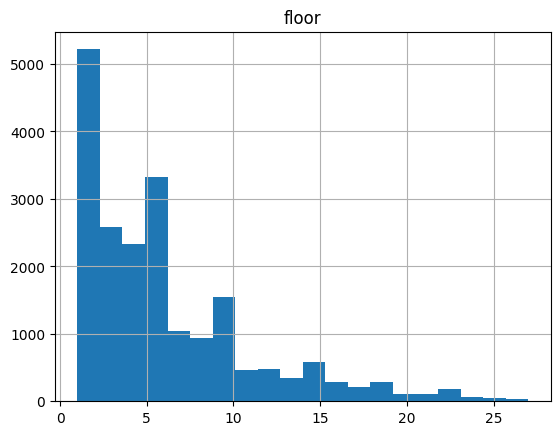

In [49]:
data.hist('floor',bins=20);

In [50]:
#проверим, нет ли обьявлений где этаж указан выше чем всего этажей

print('Этаж больше количества этажей:',data.query('floor > floors_total')\
      ['floor'].count())

Этаж больше количества этажей: 0


_Обьявлений, где этаж указан выше чем всего этажей нет. Больше всего обьявлений где этаж совпадает с колличеством этажей всего._

In [51]:
#проверим наличие обьявлений, где жилая площадь привышает общую.
print('Жилая площадь больше общей:',data.query(
    'living_area > total_area'
)['living_area'].count())

Жилая площадь больше общей: 0


In [52]:
#посмотрим на аномалии и редкие значения по "living_area" - жилой площади 
print('Жилая площадь меньше 8 кв.м.:',data.query(
    'living_area < 8'
)['living_area'].count())

print('Жилая площадь больше 200:',data.query(
    'living_area > 200'
)['living_area'].count())

Жилая площадь меньше 8 кв.м.: 11
Жилая площадь больше 200: 6


_Согласно действующим СНиПам, минимальная площадь комнаты должна быть не менее 8 квадратных метров (п. 5.3 СП 5.413330.2011), при этом её ширина не должна быть меньше 2,25 метра (п 6.1.9 СП 31-107-2004) При несоблюдении хотя бы одного из этих условий, считать комнату жилой нельзя._

Убираем квартиры с аномальными значениями меньше 8 квадратных метров и редкие значения более 200 квадратных метров.

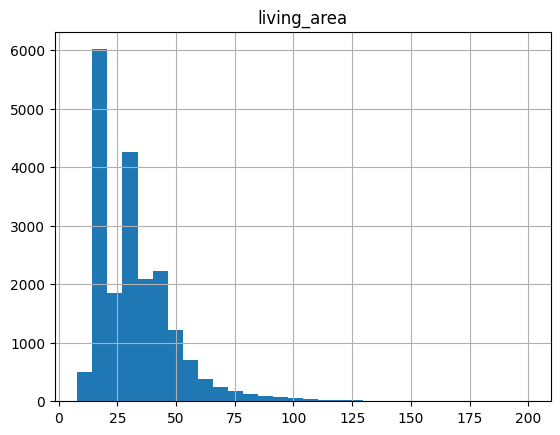

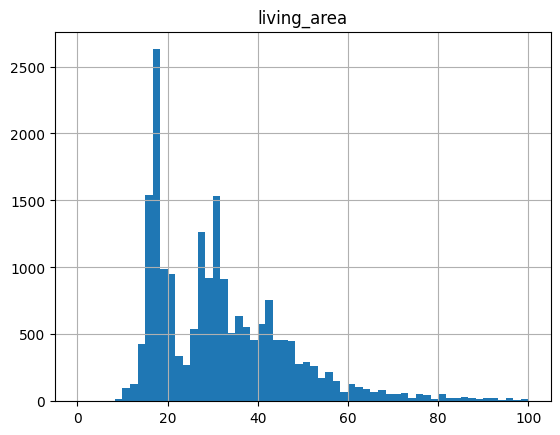

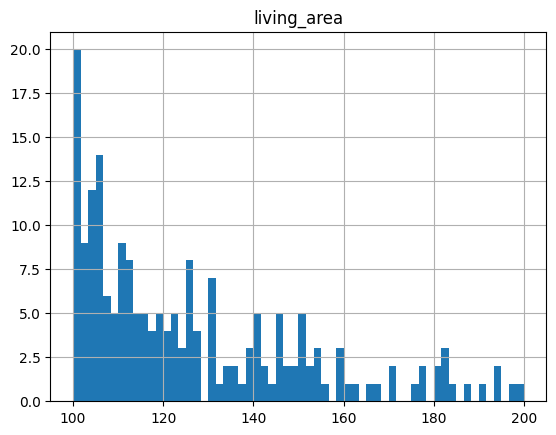

In [53]:
data.drop(
    index=data.query('living_area < 8').index,
    inplace=True
)

data.drop(
    index=data.query('living_area > 200').index,
    inplace=True
)

#посмотрим как распределяются значения на графике после удаления аномалий
data.hist('living_area', bins=30);
data.hist('living_area', bins=60, range=(0,100));
data.hist('living_area', bins=60, range=(100,200));

Площадь кухни до 2 кв.м.: 0
Площадь кухни 5 кв.м.: 303
Площадь кухни больше 50 кв.м.: 26
Площадь кухни больше общей: 0


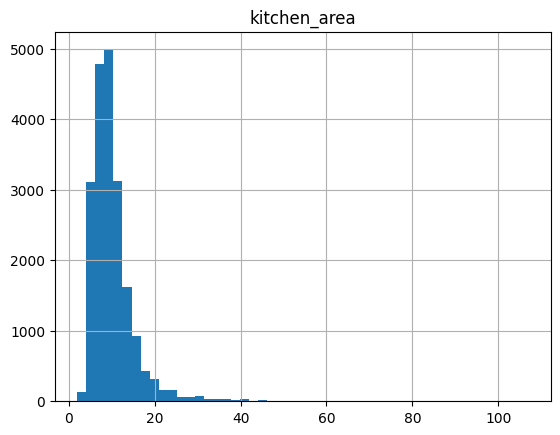

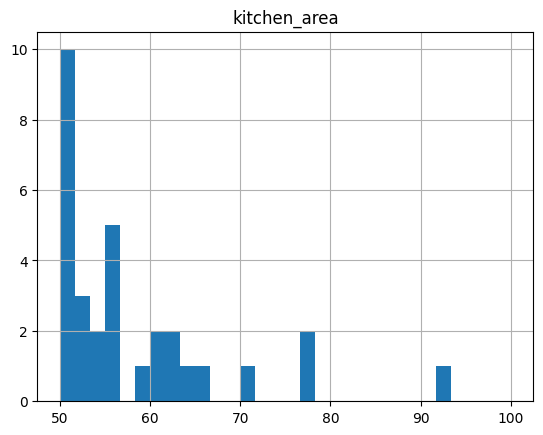

In [54]:
#исследуем параметр "kitchen_area" - площадь кухни
print('Площадь кухни до 2 кв.м.:', data.query(
    'kitchen_area < 2'
)['kitchen_area'].count())

print('Площадь кухни 5 кв.м.:', data.query(
    'kitchen_area == 5'
)['kitchen_area'].count())

print('Площадь кухни больше 50 кв.м.:',data.query(
    'kitchen_area > 50'
)['kitchen_area'].count())

#проверим наличие обьявлений где площадь кухни больше общей площади
print('Площадь кухни больше общей:', data.query(
    'kitchen_area > total_area'
)['kitchen_area'].count())

data.hist('kitchen_area', bins=50);
data.hist('kitchen_area', bins=30, range=(50,100));

По гистограмме видно, что кухни площадью более 50 квадратов это редкие значения, избавимся от таких строк.

Самая распрастраненная площадь кухни - от 6 до 10 кв.м.

In [55]:
data.drop(index=data.query('kitchen_area > 50').index,inplace=True)

Объявление не было оопубликовано: 0
Объявлению больше 4 лет: 11


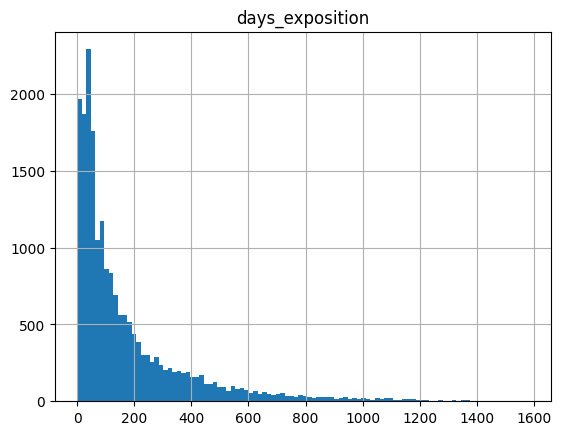

In [56]:
print('Объявление не было оопубликовано:', data.query(
    'days_exposition == 0'
)['days_exposition'].count())

print('Объявлению больше 4 лет:', data.query(
    'days_exposition > 365*4'
)['days_exposition'].count())

data.hist('days_exposition', bins=100);

`days_exposition` - количество дней размещения объявлений. Распределение показателей на гистограмме по убыванию, редкие обьявления которые висят более 4х лет, их отбросим.

In [57]:
data.drop(index=data.query('days_exposition > 365*4').index,inplace=True)

Данные о расстоянии до центра, аэропорта, ближайших парка и водоема собраны автоматизированно и по гистограммам выглядят нормально. Выбивается одна строчка с airports_nearest - близость квартир к аэропорту до 5 км. Это одна квартира, которая, похоже, располагается в аэропорту. Её удаляем.

Квартиры приближенные к аэропорту: 1


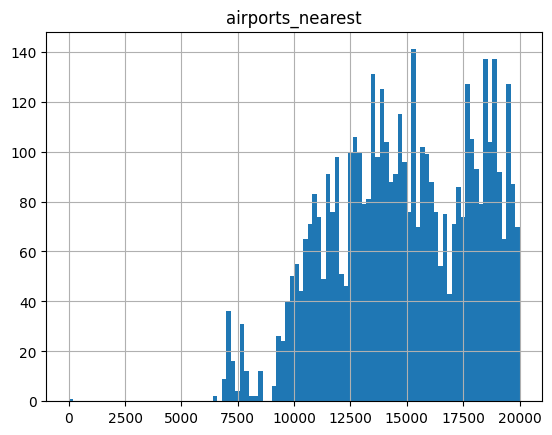

In [58]:
print('Квартиры приближенные к аэропорту:', data.query(
    'airports_nearest < 5000'
)['airports_nearest'].count())

data.hist('airports_nearest', bins=100, range=(0,20000));

data.drop(
    index=data.query('airports_nearest < 5000').index,
    inplace=True
)

In [59]:
#взглянем распределение числовых показателей данных
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,20093.000000,2.009300e+04,20093.000000,20093.000000,20093.000000,20093.000000,20093.000000,20093.000000,20093.000000,20093.000000,20093.000000,20093.000000,20093.000000,6685.000000,20093.000000,7636.000000,20093.000000
mean,9.591699,5.776413e+06,57.282873,1.994476,2.680213,10.913950,32.722664,6.004678,10.124429,0.595133,29260.776838,14437.154158,0.453541,491.958564,0.575424,524.011393,178.936296
std,5.638861,5.301844e+06,27.602575,0.978425,0.170769,6.600711,17.723040,4.934478,4.868807,0.949853,11885.874505,7624.837117,0.734650,347.793028,0.866713,276.151551,216.670153
min,0.000000,4.300000e+05,12.000000,0.000000,2.500000,1.000000,8.000000,1.000000,2.000000,0.000000,6450.000000,287.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,39.300000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,20905.000000,11159.000000,0.000000,287.000000,0.000000,304.750000,45.000000
50%,9.000000,4.500000e+06,50.340000,2.000000,2.650000,9.000000,29.800000,4.000000,9.000000,0.000000,27360.000000,13354.500000,0.000000,451.000000,0.000000,507.500000,95.000000
75%,14.000000,6.400000e+06,67.000000,3.000000,2.700000,16.000000,41.000000,8.000000,11.600000,1.000000,36222.000000,15928.000000,1.000000,614.000000,1.000000,733.000000,228.000000
max,50.000000,9.800000e+07,380.000000,6.000000,3.600000,29.000000,200.000000,27.000000,50.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1458.000000


После предобработки, данные выглядят реалистично и готовы к исследованию. 
Нам потребуются новые значения, которые необходимо посчитать в дополнительные столбцы.

### Добавим в таблицу новые столбцы

#### Цена одного квадратного метра

In [60]:
data['sqrmeter_price'] = data['last_price'] / data['total_area']

#### День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [61]:
data['dayofweek_exposition'] = pd.DatetimeIndex(
    data['first_day_exposition']
).dayofweek

#### Месяц публикации объявления

In [62]:
data['month_exposition'] = pd.DatetimeIndex(
    data['first_day_exposition']
).month

#### Год публикации объявления

In [63]:
data['year_exposition'] = pd.DatetimeIndex(
    data['first_day_exposition']
).year

#### Тип этажа квартиры (значения — «первый», «последний», «другой»)

In [64]:
def type_floor(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        'fail'

In [65]:
data['type_floor'] = data.apply(type_floor, axis = 1)

#### Расстояние до центра города в километрах

In [66]:
data['centers_nearest_km'] = round(
    data['city_centers_nearest'] / 1000
).astype('int')

In [67]:
#посмотрим как добавились новые столбцы, 
#проверим тип данных и колличество строк
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20093 entries, 1 to 23697
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           20093 non-null  int64         
 1   last_price             20093 non-null  float64       
 2   total_area             20093 non-null  float64       
 3   first_day_exposition   20093 non-null  datetime64[ns]
 4   rooms                  20093 non-null  int64         
 5   ceiling_height         20093 non-null  float64       
 6   floors_total           20093 non-null  int64         
 7   living_area            20093 non-null  float64       
 8   floor                  20093 non-null  int64         
 9   is_apartment           20093 non-null  bool          
 10  studio                 20093 non-null  bool          
 11  open_plan              20093 non-null  bool          
 12  kitchen_area           20093 non-null  float64       
 13  b

### Исследовательский анализ данных

Изучим параметры следующих обьектов с построением гистограмм:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления
  

#### Построим гистограммы для каждого параметра 

Посмотрим на численные показатели вызвав метод `describe()`

In [68]:
(
    data[[
        'total_area', 
        'living_area', 
        'kitchen_area', 
        'last_price', 
        'rooms', 
        'ceiling_height',
        'floor', 
        'type_floor', 
        'floors_total', 
        'city_centers_nearest', 
        'airports_nearest', 
        'parks_nearest',
        'dayofweek_exposition',
        'month_exposition'
    ]].apply('describe').style.format("{:,.2f}")
)

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,city_centers_nearest,airports_nearest,parks_nearest,dayofweek_exposition,month_exposition
count,"20,093.00","20,093.00","20,093.00","20,093.00","20,093.00","20,093.00","20,093.00","20,093.00","20,093.00","20,093.00","6,685.00","20,093.00","20,093.00"
mean,57.28,32.72,10.12,"5,776,412.87",1.99,2.68,6.00,10.91,"14,437.15","29,260.78",491.96,2.59,6.59
std,27.60,17.72,4.87,"5,301,844.30",0.98,0.17,4.93,6.60,"7,624.84","11,885.87",347.79,1.78,3.48
min,12.00,8.00,2.00,"430,000.00",0.00,2.50,1.00,1.00,287.00,"6,450.00",1.00,0.00,1.00
25%,39.30,18.60,7.00,"3,400,000.00",1.00,2.60,2.00,5.00,"11,159.00","20,905.00",287.00,1.00,3.00
50%,50.34,29.80,9.00,"4,500,000.00",2.00,2.65,4.00,9.00,"13,354.50","27,360.00",451.00,3.00,7.00
75%,67.00,41.00,11.60,"6,400,000.00",3.00,2.70,8.00,16.00,"15,928.00","36,222.00",614.00,4.00,10.00
max,380.00,200.00,50.00,"98,000,000.00",6.00,3.60,27.00,29.00,"65,968.00","84,869.00","3,190.00",6.00,12.00


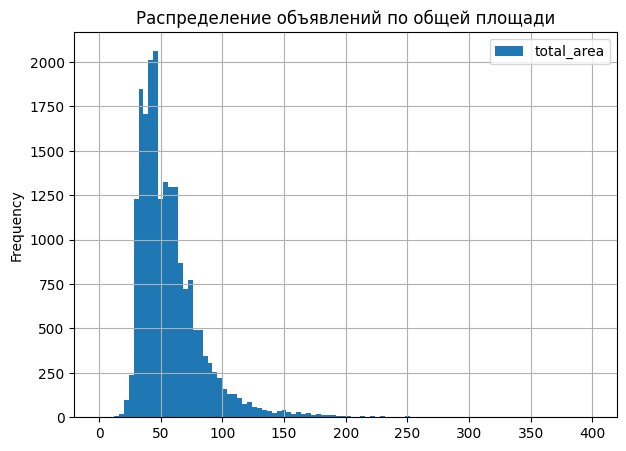

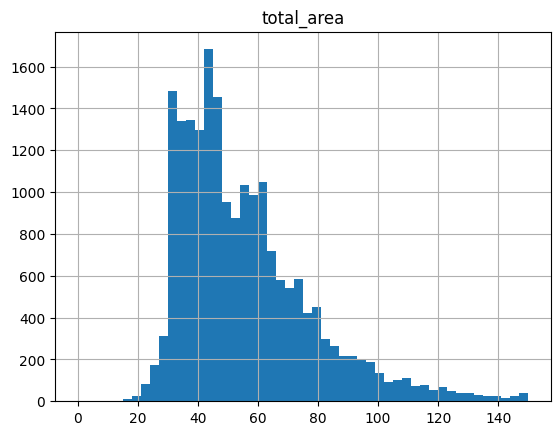

In [69]:
data.plot(
    y ='total_area', 
    kind='hist', 
    bins=100, 
    grid=True, 
    figsize=(7,5),
    range=(0,400), 
    title='Распределение объявлений по общей площади'
);

data.hist(
    'total_area', 
    bins=50, 
    range=(0,150)
);

__Общая площадь__ - в выборке остались обьявления с минимальной общей площадью в 12 кв.м. до 380 кв.м., среднее значение примерно 57 кв.м. Мало квартир с площадью свыше 200 кв.м., такая площадь квартир относится к элитному жилью. Пик предложений приходится на 45 кв.м.

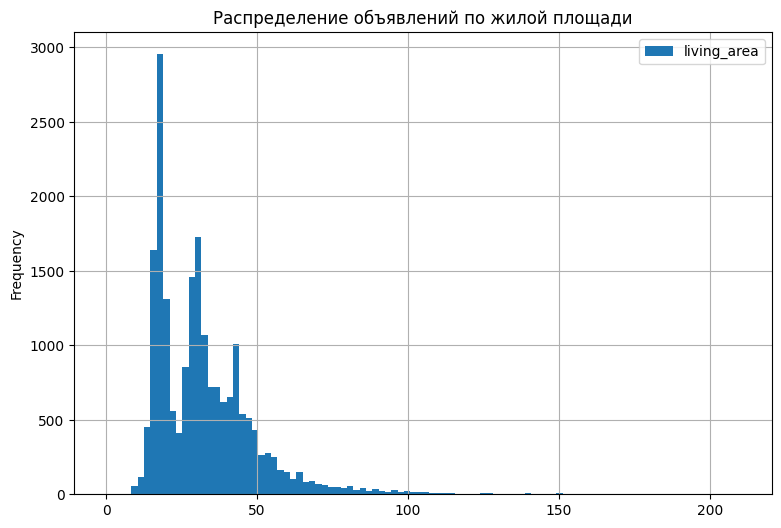

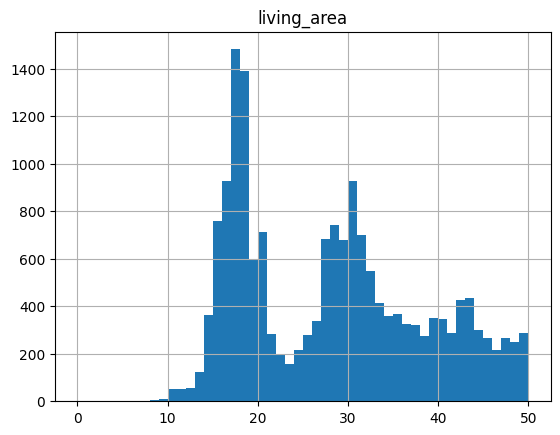

In [70]:
data.plot(
    y ='living_area', 
    kind='hist', 
    bins=100, 
    grid=True, 
    figsize=(9,6), 
    range=(0,210),  
    title='Распределение объявлений по жилой площади'
);

data.hist(
    'living_area', 
    bins=50, 
    range=(0,50)
);

__Жилая площадь__ имеет неравномерное распределение, есть пик примерно на 17-18 кв.м., потом резкий спад на 23-24 кв.м. и далее еще один пик на 30 кв.м., немного меньше чем первый пик. При этом, в параметре общая площадь не наблюдаются аналогичные явления. Вероятно, что первый пик приходится на однокомнатные квартиры а второй на двухкомнатные, если посмотреть на гистограмму распределения параметра комнат, то можно наблюдать что больше всего продается однокомнатных квартир, двухкомнатных тоже много, поэтому так и происходит рапределение жилой площади.
 

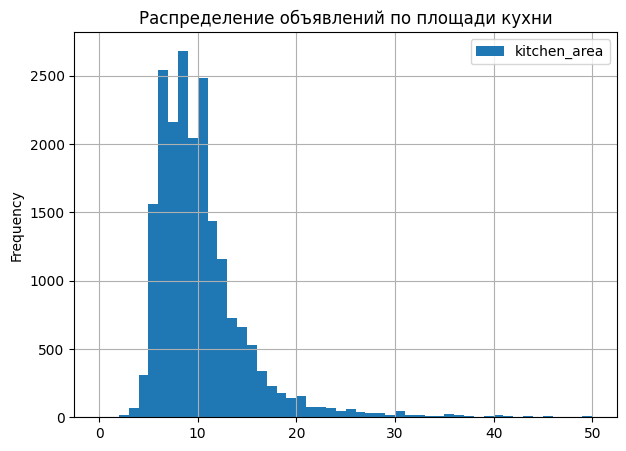

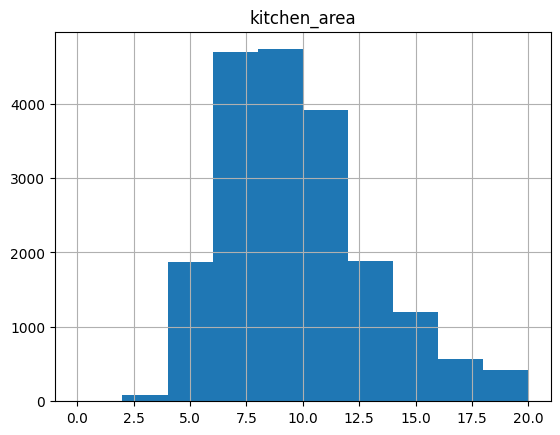

In [71]:
data.plot(
    y ='kitchen_area', 
    kind='hist', 
    bins=50, 
    grid=True, 
    figsize=(7,5),
    range=(0,50), 
    title='Распределение объявлений по площади кухни'
);

data.hist(
    'kitchen_area', 
    bins=10, 
    range=(0,20)
);

 Параметр __площадь кухни__ распределяется нормально, минимальная площадь кухни начинается от 2 кв.м., а максимальная доходит до 50 кв.м. На графике можно наблюдать длинный хвост с максимальными значениями, так же как и в общей и жилой площадях и стоимости - этот хвост говорит о том что есть элитная дорогостоящая недвижимость с большой площадью, но таких предложений не много. Для параметра площадь кухни значение  8 - 9 кв.м. является характерным для 1-3х комнатных квартир среднего класса, на него и приходится пик.

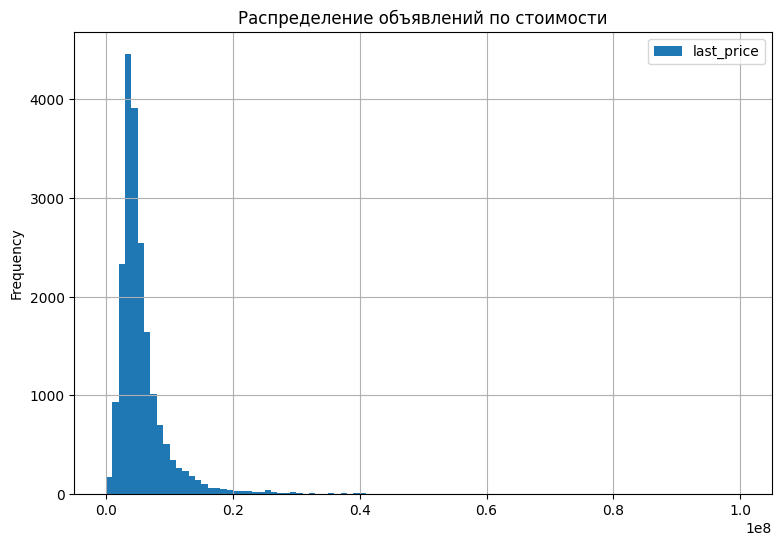

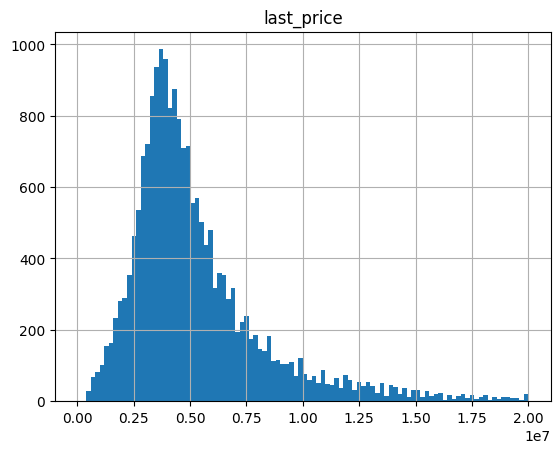

In [72]:
data.plot(
    y ='last_price', 
    kind='hist', 
    bins=100, 
    grid=True, 
    figsize=(9,6),
    range=(0,1e+08),
    title='Распределение объявлений по стоимости'
);

data.hist(
    'last_price', 
    bins=100, 
    range=(0,2e+07)
);

Распределение __стоимости__ квартир выглядит нормально, немнго "шумный" график с длинным хвостом, пик приходится на 3,75-4,5 млн.руб. Цены начинаются от 430 тыс. и доходят до 98 млн. руб., но это после удаления редких и аномально высоких значений. Средняя цена приходится на 5,777 млн., при этом медианное значение в 4,5 млн., такие предложения встречаются чаще.

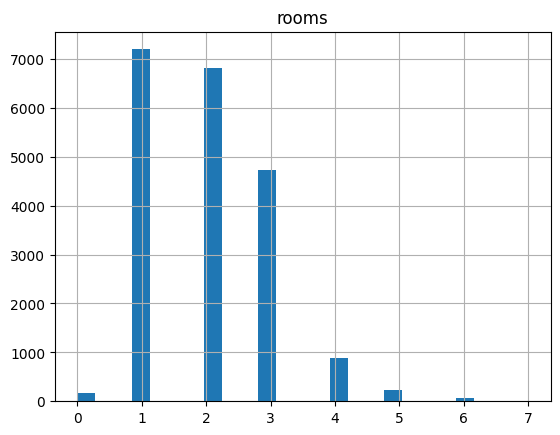

In [73]:
data.hist(
    'rooms', 
    bins=25, 
    range=(0,7)
);

Гистограмма с параметром __количество комнат__ отчетливо показывает что больше всего объявлений c однокомнатными квартирами, двухгомнатных немного меньше, оттуда и два пика по жилой площади. А вот с параметром 0 и 6 комнат квартиры есть, но их очень мало.

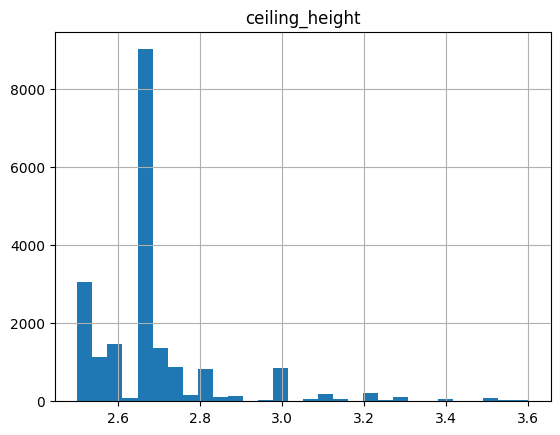

In [74]:
data.hist('ceiling_height', bins=30);

Распределение __высоты потолка__ неравномерное, есть один главный пик, приходящийся на медианное значение 2,65. Это значение характерно для большинства квартир, оно приближено к оптимальному 2,7м., но и не мало квартир с допустимым минимальным значением 2,5м.

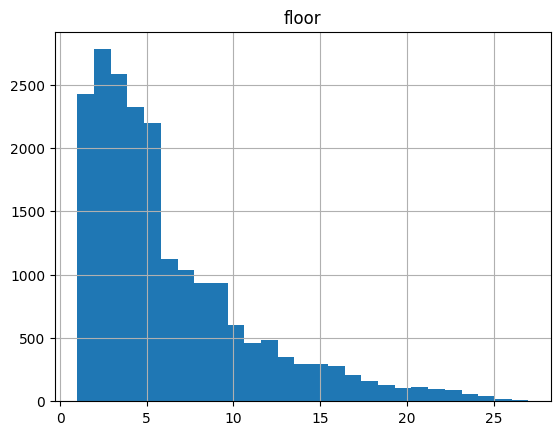

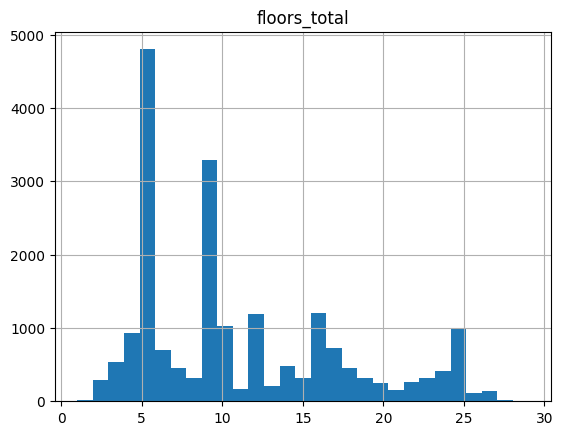

In [75]:
data.hist('floor', bins=data['floor'].max());

data.hist('floors_total', bins=data['floors_total'].max());

Параметр __этажности__ стоит рассматривать вместе сразу по показателям __этаж квартиры__ и __всего этажей в доме__. Так больше всего продается квартир с 1 по 5 этажи, и это связано с тем, что для нашей страны в целом и для Санкт-Петербурга отдельно характерны 5-ти этажные здания, их больше всего на гистограмме с параметром всего этажей в доме. Это и сталинки, и хрущевки и брежневки. Санкт-Петербург не считается городом небоскребов, и там сохраняются дома старых построек из-за их исторической ценности. Так же есть еще один не большой пик на 9ти этажные постройки, что тоже характерно для домов советской застроки, и пока таких предложений больше чем более высоких новостроек.

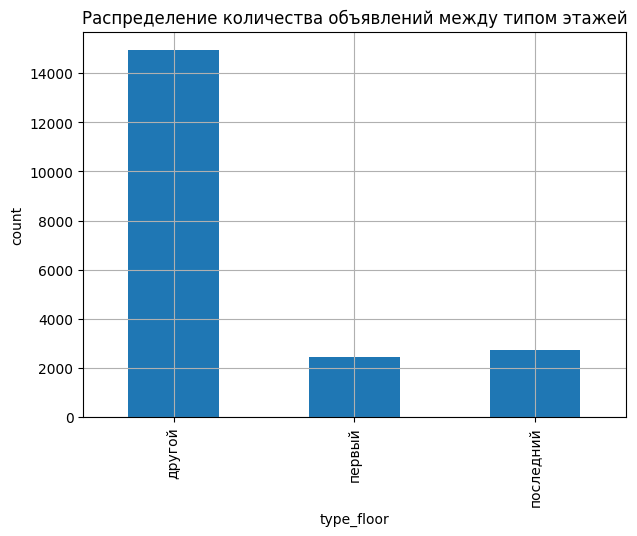

In [76]:
data.groupby(by='type_floor')['type_floor'].count()\
.plot(
    kind='bar', 
    ylabel = 'count', 
    grid=True, 
    figsize=(7,5), 
    title='Распределение количества объявлений между типом этажей'
);

__Тип этажа__ - больше распрастранен "другой", что нормально. Квартир на "первых" и "последних" этажах продается сравнительно немного и примерно в равном колличестве.

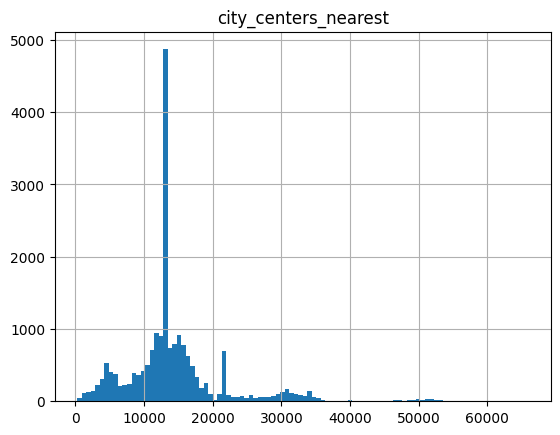

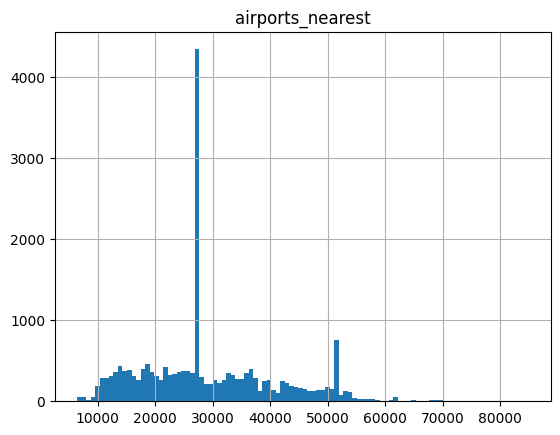

In [77]:
data.hist('city_centers_nearest', bins=100);

data.hist('airports_nearest', bins=100);

По параметрам __расстояние до центра города и до ближайшего аэропорта__ распределение по гистаграмме выглядит не равномерно, есть один резкий пик на каждом из графиков, это произошло после заполнения пропусков медианным значением групперовки по населенным пунктам. Получается, что заполнение нулевых значений по этим показателям сильно повлияло на общую картину вцелом.

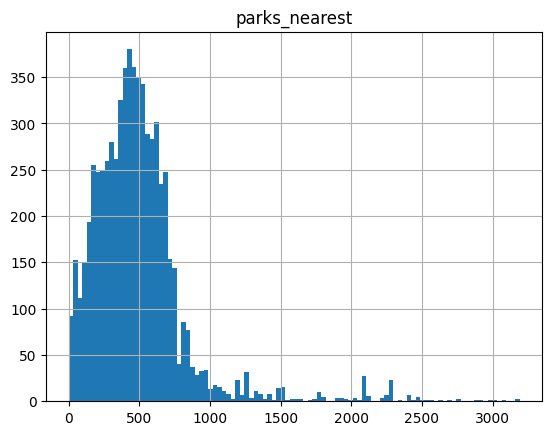

In [78]:
data.hist('parks_nearest', bins=100);

По параметру __расстояние до ближайшего парка__ можно сделать вывод, что в Санкт-Петербурге много парков и благодаря чему,  большинство квартир находится в близости к паркам примерно до 750 метров.

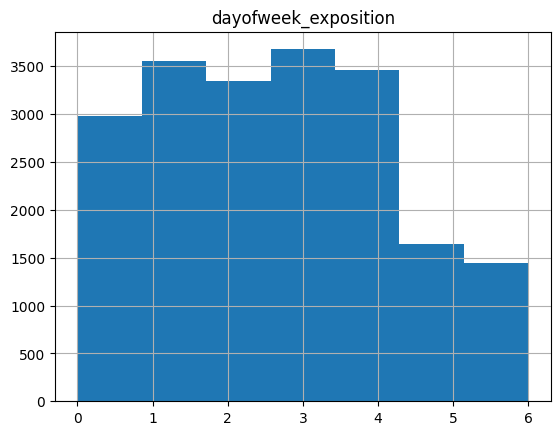

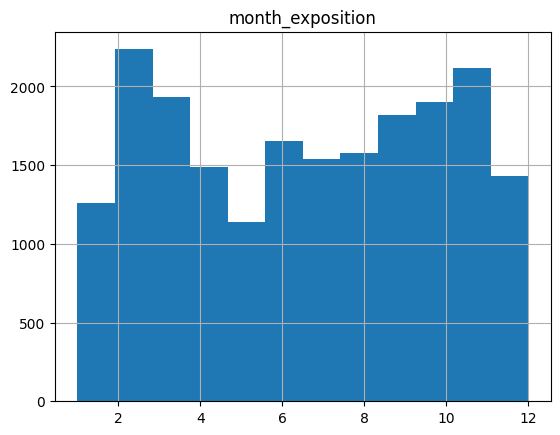

In [79]:
data.hist('dayofweek_exposition', bins=7);

data.hist('month_exposition', bins=12);

__День и месяц публикации объяления__ - чаще всего публикуют объявления во вторник и четверг, а в выходные делают это более чем в 2 раза реже. Самые активные месяцы - февраль, ноябрь и март; а январь, декабрь и май - наоборот, провельные. 

#### Изучим время продажи квартир

Среднее время продажи квартиры: 178
Медианное время продажи квартиры: 95
count    20093.000000
mean       178.936296
std        216.670153
min          1.000000
25%         45.000000
50%         95.000000
75%        228.000000
max       1458.000000
Name: days_exposition, dtype: float64


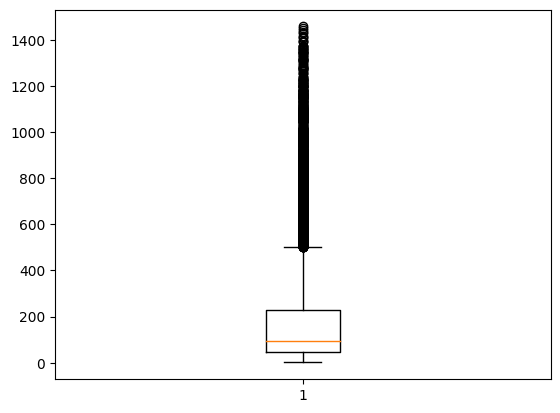

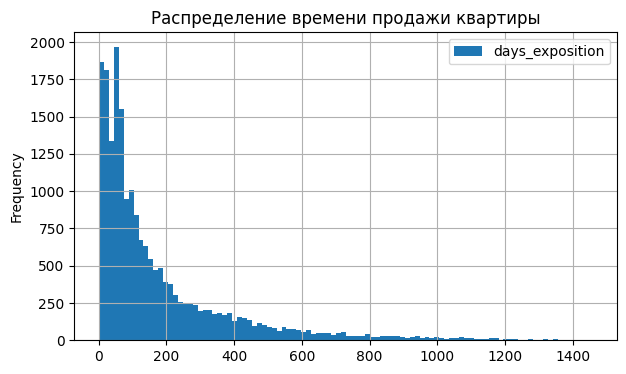

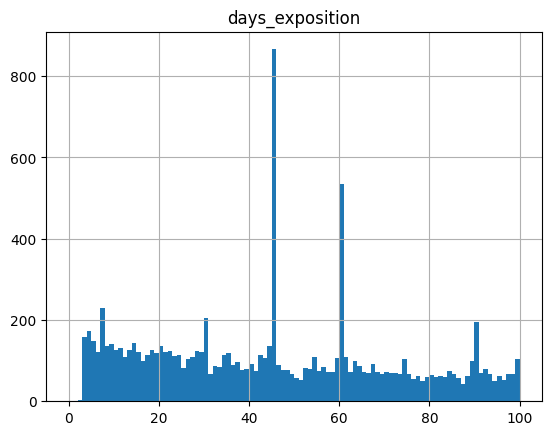

In [80]:
plt.boxplot(
    data[data['days_exposition']!=0]['days_exposition']
)

data.plot(
    y ='days_exposition', 
    kind='hist', 
    bins=100, 
    grid=True, 
    figsize=(7,4), 
    title='Распределение времени продажи квартиры'
)

data.hist('days_exposition', bins=100, range = (0,100))

print(
    'Среднее время продажи квартиры:', 
    int(data['days_exposition'].mean())
)

print(
    'Медианное время продажи квартиры:', 
    int(data['days_exposition'].median())
)

print(data['days_exposition'].describe())

Среднее время продажи квартиры 178 дней (почти пол года), при этом медианное время продажи квартиры - 95. Такая разница возникла из-за наличия обьявлений, которые продавались долго - до четырех лет, что увеличивает средний показатель.

Можно сказать, что быстрые продажи длятся до 45 дней, а необычайно долгие свыше 228 дней, так как по диаграмме размаха большая часть значений лежит от 45 дней до 250 дней, все что выше можно считать необычно долгими, что ниже - быстрыми.
Наблюдаются выбросы (шумы на 3 графике), возможно, это обусловлено работой системы - вероятно есть автоматическое закрытие объявлений, нужно посмотреть какие именно это дни и выяснить причину таких выбросов.

In [81]:
data['days_exposition'].value_counts().head()

45    866
60    535
7     230
30    206
90    195
Name: days_exposition, dtype: int64

Наблюдаются самые частые снятия обьявлений в 45, 60, 7, 30 и 90 дней.
В Яндекс.Справка в пояснениях к Яндекс.Недвижимость указана информация что установлены сроки публикации объявлений на продажу квартиры:
- до 4,5 млн — 45 дней;
- от 4,5 до 10 млн — 60 дней;
- от 10 млн — 90 дней.

Такие объявления стоит убрать создав отдельный датафрейм 

Среднее время продажи квартиры: 189
Медианное время продажи квартиры: 109
Посмотрим на числовые характеристики по дням снятия объявления: count    18497.000000
mean       189.584635
std        222.600538
min          1.000000
25%         41.000000
50%        109.000000
75%        249.000000
max       1458.000000
Name: days_exposition, dtype: float64
Самые частые дни продажи: 7     230
30    206
4     172
3     157
5     148
Name: days_exposition, dtype: int64


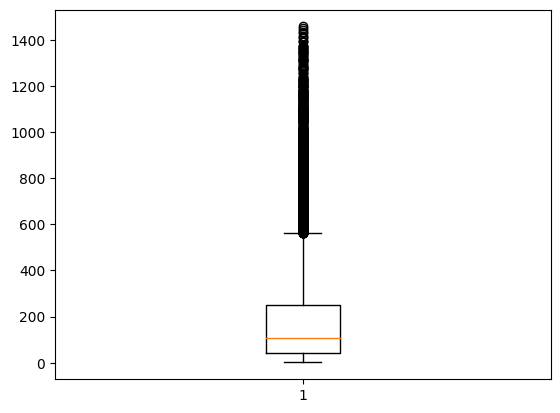

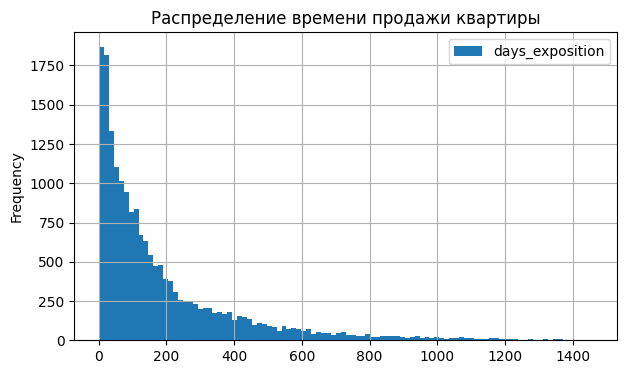

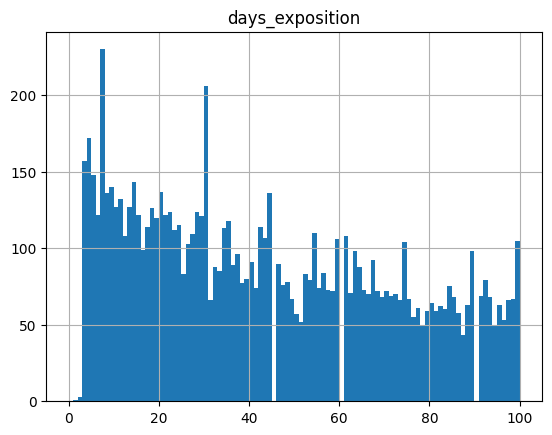

In [82]:
good_data = data.query(
    'days_exposition != 45 and days_exposition != 60 and days_exposition != 90'
)

#посмотрим как поменялись значения
plt.boxplot(
    good_data[good_data['days_exposition']!=0]['days_exposition']
)

good_data.plot(
    y ='days_exposition', 
    kind='hist', 
    bins=100, 
    grid=True, 
    figsize=(7,4),
    title='Распределение времени продажи квартиры'
)
good_data.hist('days_exposition', bins=100, range = (0,100))

print(
    'Среднее время продажи квартиры:', 
    int(good_data['days_exposition'].mean())
)
print(
    'Медианное время продажи квартиры:', 
    int(good_data['days_exposition'].median())
)

#посмотрим на числовые характеристики
print(
    'Посмотрим на числовые характеристики по дням снятия объявления:',
    good_data['days_exposition'].describe()
)

#посмотрим на самые частые объявления по дням снятия с публикации
print(
    'Самые частые дни продажи:',
    good_data['days_exposition'].value_counts().head()
)

Значения среднее и медианы увеличились, среднее было 178 стало - 189, медиана была 95 дней, стала - 109 дней.
Теперь чаще всего закрываются обьявления на 7 и на 30 день.

Судя по диаграмме размаха, быстрыми можно считать продажи до 41 дня, а необычно долгими - свыше 249 дней.

#### Факторы влияющие на стоимость объекта

__Изучим зависимость между стоимостью квартиры и её площадью__

Коэффициент корреляции: 0.7420960464038041


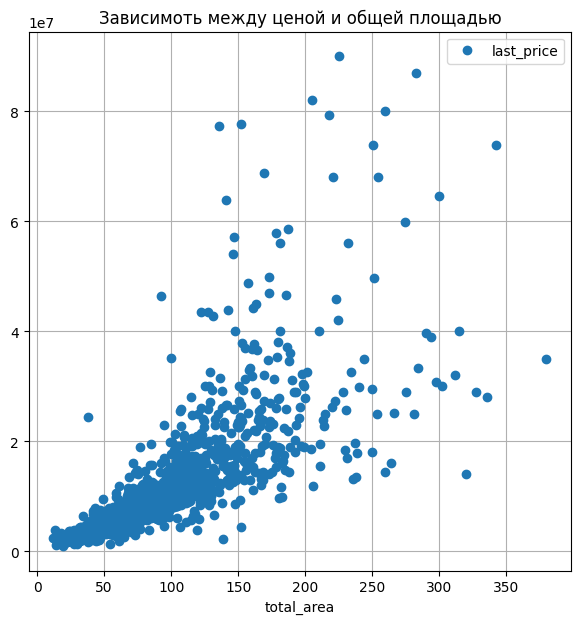

In [83]:
data.pivot_table(index='total_area', values='last_price').plot(
    grid=True, 
    style='o', 
    figsize=(7,7), 
    title='Зависимоть между ценой и общей площадью'
);

print(
    'Коэффициент корреляции:', 
    data['last_price'].corr(data['total_area'])
)

Между стоимостью и общей площадью квартиры положительный коэффициент корреляции Пирсона составляет 0.74 - это говорит о тесной взаимосвязи между этими показателями. Чем больше  общая площадь квартиры, тем выше ее стоимость. 

Но есть и выбивающиеся значения - с меньшей площадью, но с большей стоимостью. Это говорит о том что есть и другие факторы влияющие на стоимость объекта, посмотрим на них далее.

__Рассмотрим влияние жилой площади на стоимость объекта__

Коэффициент корреляции: 0.653335382698512


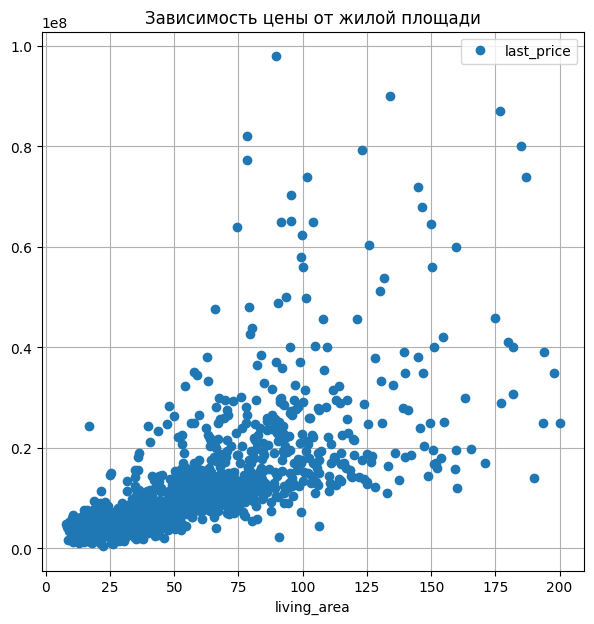

In [84]:
data.pivot_table(index='living_area', values='last_price').plot(
    grid=True, 
    style='o', 
    figsize=(7,7), 
    title='Зависимость цены от жилой площади'
);

print(
    'Коэффициент корреляции:', 
    data['last_price'].corr(data['living_area'])
)

Между жилой площадью и стоимостью квартиры коэффициент корреляции тоже положительный, равен 0.65, влияние ощутимо, но меньше чем между ценой и общей стоимостью квартиры.

__Изучим влияние площади кухни на цену__

Коэффициент корреляции: 0.5651871144208165


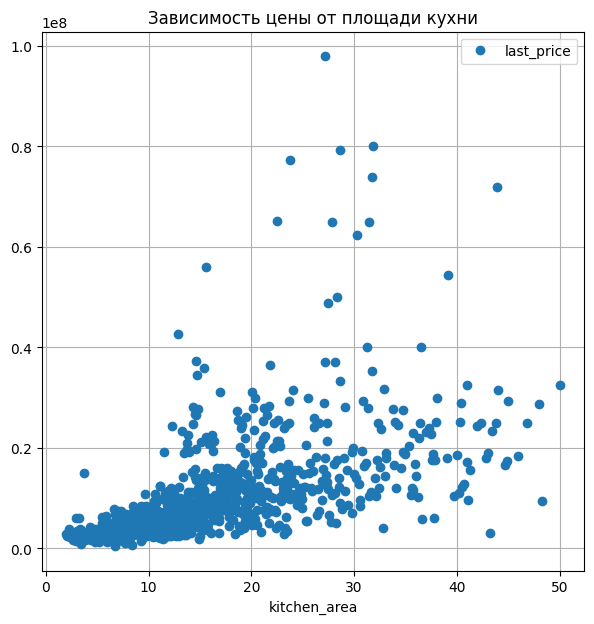

In [85]:
data.pivot_table(index='kitchen_area', values='last_price').plot(
    grid=True, 
    style='o', 
    figsize=(7,7), 
    title='Зависимость цены от площади кухни'
);

print(
    'Коэффициент корреляции:', 
    data['last_price'].corr(data['kitchen_area'])
)

Зависимость между стоимостью квартиры и площадью кухни уже не такая сильная, но она наблюдается, она положительная и коэффициент равен 0,56. Но вероятнее всего она обусловлена тем что зачастую в квартирах большей площади и кухни больше, при этом во многих квартирах постойки советских времен, кухни были примерно равными как в одно-, двух-, так и в трехкомнатных квартирах, поэтому взаимосвязь между этими показателями хоть и есь, но не так высока как между общей площадью и ценой.

__Рассмотрим влияние колличества комнат на стоимость__

Коэффициент корреляции: 0.4504372874425594


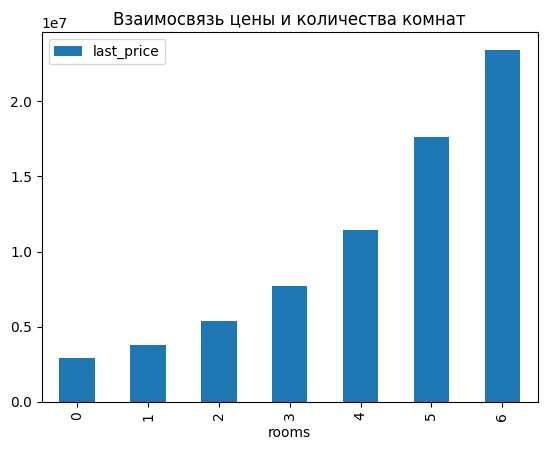

In [86]:
data.pivot_table(index='rooms', values='last_price')\
.plot(y='last_price', kind='bar', title='Взаимосвязь цены и количества комнат');

print('Коэффициент корреляции:', data['last_price'].corr(data['rooms']))

Коэффициент корреляции Пирсона между ценой и колличеством комнат положительный и равен 0.45, это говорит о взаимосвязи этих параметров, но она меньше чем  между предыдущими рассмотренными параметрами, хотя на графике четко прорисовывается эта взаимосвязь - чем больше комнат - тем больше стоимость жилья.

__Посмотрим на влияние типа этажа на стоимость объекта__

Коэффициент корреляции:             last_price
last_price         1.0


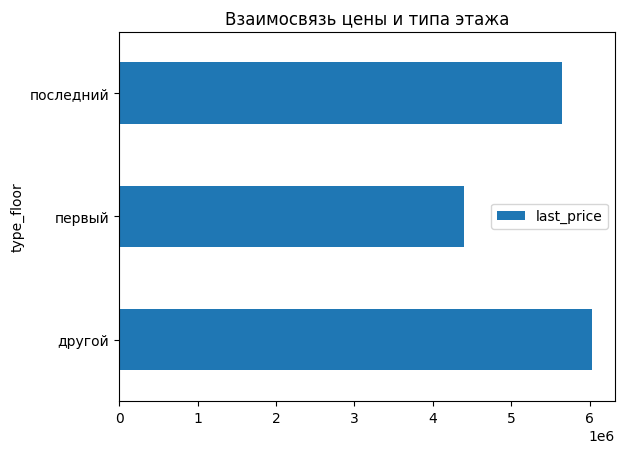

In [87]:
 data.pivot_table(index='type_floor',values='last_price')\
    .plot(y='last_price', kind='barh', title='Взаимосвязь цены и типа этажа');
    
type_floor_addiction = data.pivot_table(index='type_floor',\
                                        values=['last_price'], aggfunc='median')

print('Коэффициент корреляции:', type_floor_addiction.corr())


По графику видно что первые этажи дешевле, последние не много дороже, а у этажей выше первого этажа и ниже последнего чаще встречается более высокая цена. Вероятнее всего, большим спросом пользуются не первые и не последние этажи, но прямой взаимосвязи между этими коэффициентами нет.

__Посмотрим на влияние даты размещения на стоимость__

Коэффициент корреляции между ценой и днем публикации: 0.005161335946907331
Коэффициент корреляции между ценой и месяцем публикации: 0.013651217432161812
Коэффициент корреляции между ценой и годом публикации: -0.07669007617080419


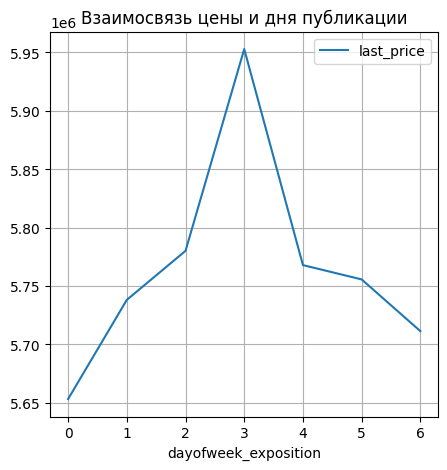

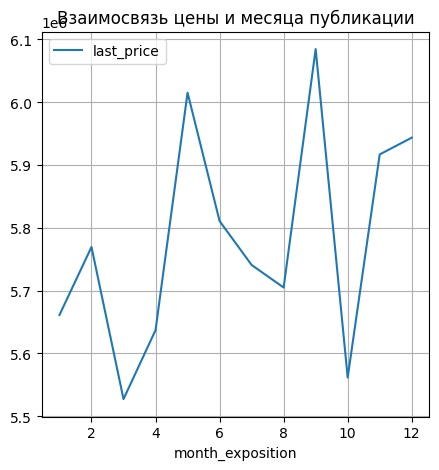

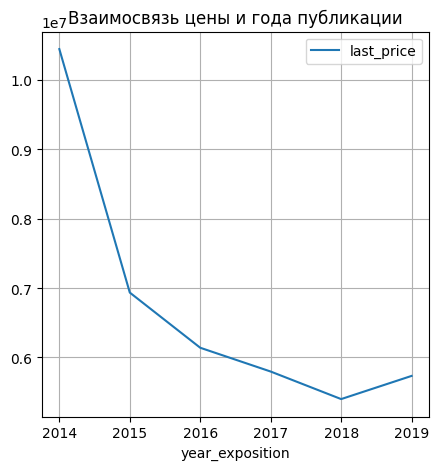

In [88]:
data.pivot_table(
    index='dayofweek_exposition', 
    values='last_price'
).plot(
    grid=True, 
    style='-', 
    figsize=(5,5), 
    title='Взаимосвязь цены и дня публикации'
);

data.pivot_table(
    index='month_exposition', 
    values='last_price'
).plot(
    grid=True, 
    style='-', 
    figsize=(5,5), 
    title='Взаимосвязь цены и месяца публикации'
);

data.pivot_table(
    index='year_exposition', 
    values='last_price'
).plot(
    grid=True, 
    style='-', 
    figsize=(5,5), 
    title='Взаимосвязь цены и года публикации'
);

print(
    'Коэффициент корреляции между ценой и днем публикации:', 
    data['last_price'].corr(data['dayofweek_exposition'])
)

print(
    'Коэффициент корреляции между ценой и месяцем публикации:', 
    data['last_price'].corr(data['month_exposition'])
)

print(
    'Коэффициент корреляции между ценой и годом публикации:', 
    data['last_price'].corr(data['year_exposition'])
)

Посмотрим на коэффициент корреляции между:
- ценой и днем публикации: 0.004945941716029477
- ценой и месяцем публикации: 0.01379243003070114
- ценой и годом публикации: -0.0767073180378095

Очевидно ни день, ни месяц, ни год публикации объявления не влияет на цену, очень низкие коэффициенты корреляции между этими параметрами, и даже наблюдается отрицательная корреляция между ценой и годом публикации. По графику мы можем наблюдать падение цены до 2018 года, и рост в 2019 году.

_Как выше было выявлено - наибольшая зависимость между стоимостью и общей площадью квартиры, поэтому, проверим как менялся средний показатель общей площади в разные годы._ 

,sqrmeter_price,total_area
year_exposition,,
2014,116427.869238,80.421835
2015,98739.170627,66.132228
2016,96457.382304,59.876590
2017,95409.130532,57.858534
2018,96112.993765,54.793078
2019,105733.464233,52.823249


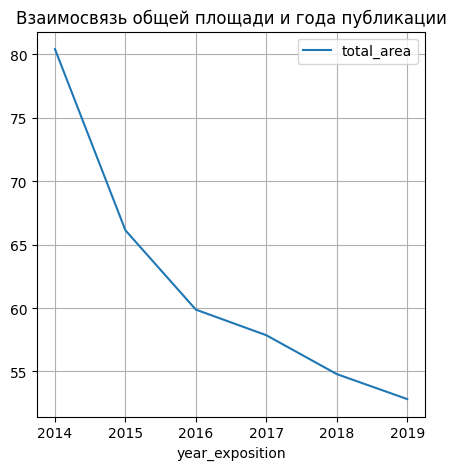

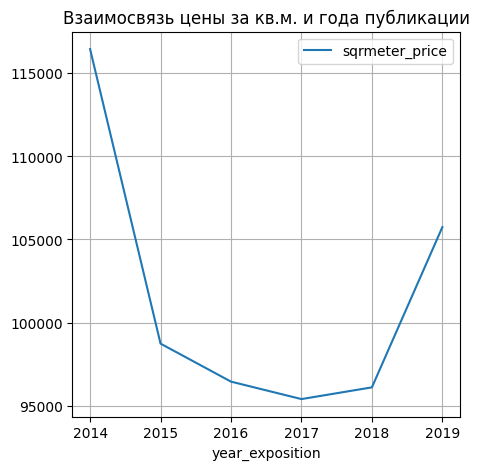

In [89]:
data.pivot_table(
    index='year_exposition', 
    values='total_area'
).plot(
    grid=True, 
    style='-', 
    figsize=(5,5), 
    title='Взаимосвязь общей площади и года публикации'
);

data.pivot_table(
    index='year_exposition', 
    values='sqrmeter_price'
).plot(
    grid=True, 
    style='-', 
    figsize=(5,5), 
    title='Взаимосвязь цены за кв.м. и года публикации'
);

data.pivot_table(
    index='year_exposition', 
    values=['total_area', 'sqrmeter_price'], 
    aggfunc = 'mean'
)

Если рассматривать в динамике как меняется среднее значение общей площади продаваемых квартир, то по графику виден спад этого параметра от 80 кв.м. в 2014 году до 52 кв.м. в 2019 г. Как было выявлено ранее, общая площадь сильнее остальных параметров оказывает влияние на ценообразование. Поэтому, можно предположить, что снижение средней цены в течении рассматриваемого периода ежегодно снижалась до 2018 г. из-за уменьшения среднего показателя общей площади продаваемых квартир. 

Но если рассмотреть динамику средней цены за квадратный метр, то этот показатель планомерно снижается с 2014 г. от 116,4 тыс.руб за кв.м. по 2017 г. до 95,4 тыс.руб. за кв.м., далее наблюдается небольшой рост в течении двух лет. Этот график больше похож на график зависимости между ценой и годом публикации.

__Рассмотрим зависимость между ценой и расстоянием до центра__

Коэффициент корреляции между ценой и расстоянием до центра: -0.27268132085228525


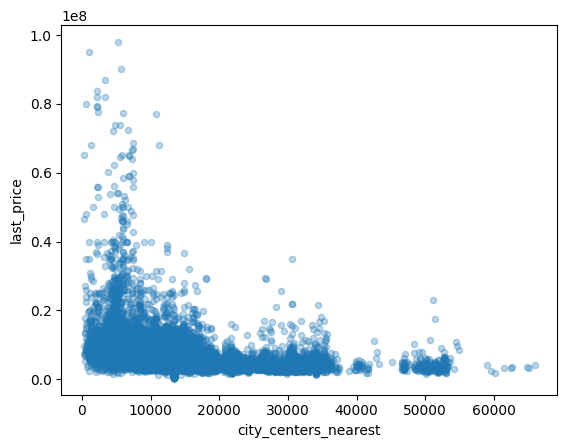

In [90]:
data.plot(
    kind = 'scatter', 
    y = 'last_price', 
    x = 'city_centers_nearest', 
    alpha = 0.3
);

print(
    'Коэффициент корреляции между ценой и расстоянием до центра:', 
    data['city_centers_nearest'].corr(data['last_price'])
)

Отрицательная корреляция -0.27, подтверждает тот факт что чем ближе к центру тем дороже объекты недвижимости, и по графику видно что самые дорогие квартиры находятся ближе к центру. Но сам показатель корреляции не велик, у взаимосвязи между ценой и общей площадью он гораздо больше, поэтому размер площади больше влияет на цену чем расстояние до центра.

#### Выделим населенные пункты с самой высокой и низкой стоимостью квадратного метра. 

In [91]:
#посчитаем среднюю цену одного квадратного метра 
#в 10 населенных пунктах с наибольшим числом обьявлений.
locality_pivot = data.pivot_table(
    index = 'locality_name_replace', 
    values = 'sqrmeter_price', 
    aggfunc=['count', 'mean']
)

#переименуем столбцы
locality_pivot.columns = ['count', 'mean']

#отсортируем таблицу
locality_pivot = locality_pivot.sort_values(
    'count', 
    ascending = False
).head(10)

#посмотрим на топ 10 населенных пунктов с наибольшим числом обьявлений
print(locality_pivot)
print()

#Выделим населенный пункт с самой высокой стоимостью за кв.м.
print('Населенный пункт с самой высокой стоимостью за кв.м.:')
print(locality_pivot[locality_pivot['mean']==locality_pivot['mean'].max()])
print()

#Выделим населенный пункт с самой низкой стоимостью за кв.м.
print('Населенный пункт с самой низкой стоимостью за кв.м.:')
print(locality_pivot[locality_pivot['mean']==locality_pivot['mean'].min()])

                       count           mean
locality_name_replace                      
санкт-петербург        13323  110528.167251
поселок мурино           550   85714.940358
поселок шушары           407   77984.516786
всеволожск               337   68449.871283
колпино                  306   74782.536862
поселок парголово        300   89702.539173
деревня кудрово          299   92473.547576
пушкин                   297  101539.116950
гатчина                  268   67928.326990
выборг                   202   57107.392764

Населенный пункт с самой высокой стоимостью за кв.м.:
                       count           mean
locality_name_replace                      
санкт-петербург        13323  110528.167251

Населенный пункт с самой низкой стоимостью за кв.м.:
                       count          mean
locality_name_replace                     
выборг                   202  57107.392764


_Больше всего оъявлений в Санкт-Петербурге 13 323 шт., в топ 10 по колличеству объявлений попали населенные пункты с колличеством объявлений более 201 шт._ 

_Самая высокая стоимость за квадратный метр среди 10 населенных пунктов с самым большим колличеством объявлений в Санкт-Петербурге, в среднем составляет  110 528.16 руб._

_Самая низкая стоимость за квадратный метр среди выделенных населенных пунктов в Выборге, в среднем составляет 57 107,39 руб._

#### Изучим как стоимость объектов зависит от расстояния до центра города. 

Коэффициент корреляции между ценой и расстоянием до центра Санкт-Петербурга: -0.36012


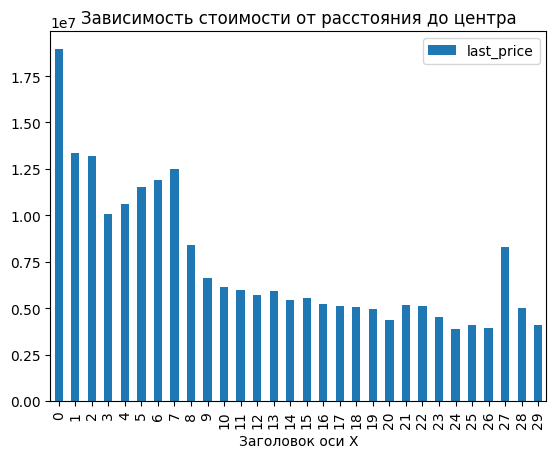

In [92]:
#выделим в отдельный датафрейм data_spb квартиры в Санкт-Петербурге
data_spb = data.query('locality_name_replace=="санкт-петербург"')

#вычислим среднюю цену каждого километра и построим график
data_spb.pivot_table(
    index='centers_nearest_km', 
    values='last_price', 
    aggfunc='mean'
).plot(
    kind='bar', 
    title = 'Зависимость стоимости от расстояния до центра'
)
plt.xlabel('Заголовок оси Х')

#посмотрим на корреляцию между ценой и расстоянием 
#до центра в пределах Санкт-Петербурга
print(
    'Коэффициент корреляции между ценой и расстоянием до центра Санкт-Петербурга:', 
    round(data_spb['centers_nearest_km'].corr(data_spb['last_price']), 5)
)

_Если смотреть по карте города Санкт-Петербурга, то Центральный район распологается примерно в пределах радиуса не более 4 км, но близлежащие районы, такие как Адмиралтейский, Василеостровский и Петроградский, распологаются в плотную к Центральному и удаленность примерно в 8 км._

Стоимость жилья в пределах до одного километра от центра значительно больше объектов отдаленных от центра, но в пределах 8 километров от центра так же наблюдается превышение стоимости квартир, за счет их приближенности к центру. Далее идет равномерное распределение и скачок на 27 километре от центра.

Корреляция между ценой и расстоянием от центра составляет :-0,3601, что говорит о взаимосвязи роста цены с уменьшением расстояния до центра, но данная взаимосвязь не сильная, так как по графику мы видим примерно равные показатели на расстояниях от 10  до 23 километров и рост цены с ростом удаленности с 3 по 7 км.

__Посмотрим на параметры квартир расположенных на 27 километре от центра.__

In [93]:
data_spb.query('centers_nearest_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_replace,sqrmeter_price,dayofweek_exposition,month_exposition,year_exposition,type_floor,centers_nearest_km
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,0,NaN,128,санкт-петербург,193918.918919,1,11,2017,другой,27
5961,6,2250000.0,32.0,2018-02-27,1,2.65,2,16.5,2,False,...,0,NaN,178,санкт-петербург,70312.500000,1,2,2018,последний,27


Таких квартир в полученном датафрейме всего 2 из них высокая стоимость только у одной квартиры площадью 74 кв.м., колличество комнат 2, при этом квартира на 3 этаже в 5 этажном доме (даты постойки у нас нет но маловероятно что это новостройки), цена за квадратный метр составляет 193 918 руб.

Примечательны в этой квартире параметры - высота потолка в 3,13м.; площадь кухни в размере 25 кв.м., вероятнее всего это кухня объедененная с комнатой, в результате образующая гостинную; наличие парка в радиусе 3 км.

Данная квартира является редким и выбивающимся объявлением из датафрейма. 

### Общий вывод

Для проведения исследовательского анализа данных, получен датафрейм с данными сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за 2014 - 2019 гг.

В полученном датафрейме 22 слолбца 23699 строк. По описанию данных к проекту столбцы содержат два вида данных - первые вписаны пользователем (например, количество комнат, высота потолка, этаж, количество балконов, площадь и т.д.), вторые — получены автоматически на основе картографических данных (например, расстояние до центра, аэропорта, ближайшего парка и водоёма). 

При работе с данными были выявлены и обработаны следующие проблемы:
1. Наименование столбца `cityCenters_nearest` приведен к змеиному регистру с помощью переименования методом `rename()`.
2. В описании к данным заявлено - 3 столбца с булевым типом данных, по факту - только два таких столбца (`open_plan` и `studio`), а в `is_apartment` тип `object` вместо заявленного `bool` - был изменен тип на `bool`.
3. Пропущенны значения в 14 столбцах из 22 - были обработаны несколькими способами: медианными значениями с группировкой по показателям; нулевыми значениями или `False` в случае если отсутствие данных может говорить о том что значение нулевое (например, количество балконов); ,были удалены строки где невозможно было логически заполнить данные (например наименование населенного пункта) при этом количество строк было не существенным; и оставленны пропуски в данных о растоянии до ближайшего парка и водоёма, так как эта информация не несет смысловой нагрузки для исследования.
4. В 5 столбцах где по смыслу должны быть целые числа (`int`) тип данных `float` (вещественный тип), в некоторых столбцах, где необходимо это посмыслу, был изменен тип данных. 
5. Есть аномальные значения в столбцах с данными о высоте потолка, общей площадью квартиры, количеством комнат, жилой площади, площадью кухни, стоимостью квартиры, о количестве этажей всего. Некоторые аномальные значения были исправлены там где вероятнее всего была допущена ошибка (например, выоста потолка 25 - 36 метров и стоимость квартиры в 12190руб.). Другие выбивающиеся значения которые отличались из стандартов для жилья (например, высота потолка до 2,5 метров и жилой площадью меньше 8 км.м.) были удалены как и значения существенно большие чем большинство показателей в параметрах стоимости, общей площади, количества комнат. 
6. Неявные дубликаты в наименовании населенных пунктов были обработаны: данные были приведены к нижнему регистру; буквы `ё` заменены на `е`; заменен `городской поселок` на `поселок городского типа`.

_К пропускам данных вероятнее всего привели технические ошибки и человеческий фактор - ввиду непонимания что при отсутствии того или иного показателя все равно нужно заполнять, в случае с наименованием населенного пункта - не всегда удается найти тот или иной пункт в классификаторе. Остались незаполнеными данные о расстоянии до ближайшего парка и водоема, их оставляем как есть так как доля пропусков существенная, более 50% и если заполнять медианой или средним значением это существенно повлияет на показатели и может исказить данные для анализа._

_По логике - в таких столбцах как количество балконов, аппартаменты, наличие парка или водоема, говорят о том что они отсутствуют и поэтому их заполнили 0. В других данных правильнее было заполнить медианным значением, так как медиана в отличие от среднего значения, менее чувствительна к выбросам, среднее значение смещается в сторону выбросов._

_Тип данных необходимо менять для экономии памяти, удобства анализа и  визуализации данных, группировки по категориям в целом для удобства работы с такими данными._

__При проведении исследовательского анализа параметров объектов, были приведены выводы:__

 
 - __Общая площадь__ - в выборке остались обьявления с минимальной общей площадью в 12 кв.м. до 380 кв.м., среднее значение примерно 57 кв.м. Мало квартир с площадью свыше 200 кв.м., такая площадь квартир относится к элитному жилью. Пик предложений приходится на 45 кв.м.
 
 - __Жилая площадь__ имеет неравномерное распределение, есть пик примерно на 17-18 кв.м., потом резкий спад на 23-24 кв.м. и далее еще один пик на 30 кв.м., немного меньше чем первый пик. При этом, в параметре общая площадь не наблюдаются аналогичные явления. Вероятно, что первый пик приходится на однокомнатные квартиры, а второй на двухкомнатные. Если посмотреть на гистограмму распределения параметра комнат, то можно наблюдать что больше всего продается однокомнатных квартир, двухкомнатных тоже много, поэтому так и происходит рапределение жилой площади.
 
 - Параметр __площадь кухни__ распределяется нормально, минимальная площадь кухни начинается от 2 кв.м., а максимальная доходит до 50 кв.м. На графике можно наблюдать длинный хвост с максимальными значениями, так же как и в общей и жилой площадях и стоимости - этот хвост говорит о том что есть элитная дорогостоящая недвижимость с большой площадью, но таких предложений не много. Для параметра площадь кухни значение  8 - 9 кв.м. является характерным для 1-3х комнатных квартир среднего класса, на него и приходится пик. 
 
 - Распределение __стоимости__ квартир выглядит нормально, немнго "шумный" график с длинным хвостом, пик приходится на 3,75-4,5 млн.руб. Цены начинаются от 430 тыс. и доходят до 98 млн. руб., но это после удаления редких и аномально высоких значений. Средняя цена приходится на 5,777 млн., при этом медианное значение в 4,5 млн., такие предложения встречаются чаще.
 
 - Гистограмма с параметром __количество комнат__ отчетливо показывает что больше всего объявлений c однокомнатными квартирами, двухгомнатных немного меньше, оттуда и два пика по жилой площади. А вот с параметром 0 и 6 комнат квартиры есть, но их очень мало.
 
 - Распределение __высоты потолка__ неравномерное, есть один главный пик, приходящийся на медианное значение 2,65. Это значение характерно для большинства квартир, оно приближено к оптимальному 2,7м., но и не мало квартир с допустимым минимальным значением 2,5м.
 
 - Параметр __этажности__ стоит рассматривать вместе сразу по показателям __этаж квартиры__ и __всего этажей в доме__. Так больше всего продается квартир с 1 по 5 этажи, и это связано с тем, что для нашей страны в целом и для Санкт-Петербурга отдельно характерны 5-ти этажные здания, их больше всего на гистограмме с параметром всего этажей в доме. Это и сталинки, и хрущевки и брежневки. Санкт-Петербург не считается городом небоскребов, и там сохраняются дома старых построек из-за их исторической ценности. Так же есть еще один не большой пик на 9ти этажные постройки, что тоже характерно для домов советской застроки, и пока таких предложений больше чем более высоких новостроек.
 
 - __Тип квартиры__ - больше распрастранен "другой", что нормально. Квартир на "первых" и "последних" этажах продается сравнительно немного и примерно в равном колличестве.
 
 - По параметрам __расстояние до центра города и до ближайшего аэропорта__ распределение по гистаграмме выглядит не равномерно, есть один резкий пик на каждом из графиков, это произошло после заполнения пропусков медианным значением групперовки по населенным пунктам. Получается, что заполнение нулевых значений по этим показателям сильно повлияло на общую картину вцелом.
 
 - По параметру __расстояние до ближайшего парка__ можно сделать вывод, что в Санкт-Петербурге много парков и благодаря чему,  большинство квартир находится в близости к паркам примерно до 750 метров.
 
 - __День и месяц публикации объяления__ - чаще всего публикуют объявления во вторник и четверг, а в выходные делают это более чем в 2 раза реже. Самые активные месяцы - февраль, ноябрь и март; а январь, декабрь и май - наоборот, провальные.
 
При исследовании времени продажи, были выявлены частые снятия обьявлений в 45, 60, 7, 30 и 90 дней. В Яндекс.Справка в пояснениях к Яндекс.Недвижимость указана информация что установлены сроки публикации объявлений на продажу квартиры: до 4,5 млн — 45 дней; от 4,5 до 10 млн — 60 дней; от 10 млн — 90 дней. Такие объявлениябыли удалены из выборки. После чего получено среднее время продажи квартиры 189 дней (примерно пол года), при этом медианное время продажи квартиры - 109 дней. Такая разница возникла из-за наличия обьявлений, которые продавались долго - до четырех лет, что увеличивает средний показатель. При этом есть случаи когда объявления снимают уже через 2-3 дня после публикации.
Подводя итог - можно считать, что быстрые продажи длятся до 41 дня, а необычайно долгие свыше 249 дней. 

При рассмотрении факторов больше всего влияющих на стоимость объекта, было выявлено что самая тесная взаимосвязь между стоимостью и общей площадью квартиры - чем больше площадь объекта, тем больше его стоимость. На стоимость квартиры так же влияют и другие параметры, но их влияние меньше, в порядке убывания зависимости:
1. __Общая площадь__ - коэффициент корреляции +0.742 - говорит о тесной взаимосвязи, при росте площади растет и стоимость.
2. __Жилая площадь__ - коэффициент корреляции +0.653, так же наблюдается сильноя взаимосвязь.
3. __Площадь кухни__ - коэффициент корреляции +0.565. Вероятнее всего взаимосвязь обусловлена тем что зачастую в квартирах большей площади и кухни больше по площади, при этом во многих квартирах постойки советских времен, кухни были примерно равными как в одно-, двух-, так и в трехкомнатных квартирах, поэтому взаимосвязь между этими показателями хоть и есть, но не так высока как между общей площадью и ценой.
4. __Количество комнат__ - коэффициент корреляции +0.45. Очевидно что при большем количестве комнат будет и площадь увеличиваться. Но во многих квартирах современной планировки стали объединять кухни с гостинной и за счет этого уменьшается количество комнат, но увеличивается площадь кухни, но на стоимости квартиры это не сказывается, а может даже увеличивает ее стоимость. Поэтому взаимосвязь между стоимостью квартиры и площадью её  кухни больше чем с количеством комнат.
5. __Тип этажа__ (первый, последний или другой) - первые этажи дешевле, последние не много дороже, а у квартир между первым и последним этажами чаще встречается более высокая цена, вцелом таких квартир больше и напрямую этот параметр не сильно влияет на стоимость. Вероятнее всего, большим спросом пользуются не первые и не последние этажи, но прямой взаимосвязи между этими коэффициентами нет.
6. __Даты размещения__ (день недели, месяц, год) - очевидно ни день, ни месяц, ни год публикации объявления не влияет на цену, очень низкие коэффициенты корреляции между этими параметрами, и даже наблюдается отрицательная корреляция между ценой и годом публикации, хотя считается что квартиры дорожают со временем. 

Была рассмотрена диамика изменения среднего показателя общей площади продаваемых квартир по годам, наблюдается спад этого параметра от 80 кв.м. в 2014 году до 52 кв.м. в 2019 г. Как было выявлено ранее, общая площадь сильнее остальных параметров оказывает влияние на ценообразование. Поэтому, можно предположить, что снижение средней цены в течении рассматриваемого периода ежегодно снижалась до 2018 г. из-за уменьшения среднего показателя общей площади продаваемых квартир. Но если рассмотреть динамику средней цены за квадратный метр, то этот показатель планомерно снижается с 2014 г. от 116,4 тыс.руб за кв.м. по 2017 г. до 95,4 тыс.руб. за кв.м., далее наблюдается небольшой рост в течении двух лет. Этот график больше похож на график зависимости между ценой и годом публикации. Поэтому не наблюдается прямой зависимости между стоимостью и годом публикации.

Больше всего оъявлений в Санкт-Петербурге 13 324 шт., в топ 10 по колличеству объявлений попали населенные пункты с колличеством объявлений более 201 шт.

Самая высокая стоимость за квадратный метр среди 10 населенных пунктов с самым большим колличеством объявлений в Санкт-Петербурге, в среднем составляет  100 528 руб.

Самая низкая стоимость за квадратный метр среди выделенных населенных пунктов в Выборге, в среднем составляет 57 107,39 руб.

Стоимость жилья в пределах до одного километра от центра значительно больше объектов отдаленных от центра, но в пределах 8 километров от центра так же наблюдается превышение стоимости квартир, за счет их приближенности к центру. Далее идет равномерное распределение и скачок на 27 километре от центра.

Корреляция между ценой и расстоянием от центра составляет :-0,3601, что говорит о взаимосвязи роста цены с уменьшением расстояния до центра, но данная взаимосвязь не сильная, так как по графику мы видим примерно равные показатели на расстояниях от 10  до 23 километров и рост цены с ростом удаленности с 3 по 7 км.